<h3><center>M11 Practical Challenge: Decision Tree versus Random Forest Performance
    <br>By Anna Imhoff, Randy Leon, and Jinming Chen</br></h3></center>

<h3><b>Introduction</b></h3>

The Graduation Rate and Outcomes data used for this exercise can be found under the Graduate Rate Database section of the [NY State Education Department (NYSED)](https://data.nysed.gov/downloads.php).  First, we will upload the data set to our Github repository.  The original data set contains 73,152 observations and 28 attributes.  Then, we will create a categorical response variable called reg_pct_level that will contain low, medium, and high. These categories will be based on the percentage of enrolled students that were awarded a Regents diploma. Exploratory data analysis will be performed on the variables to familiarize us with the high school graduation attributes, identify trends and missing data, and gather preliminary predictive inferences. We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included in our two decision tree models and our two random forest models. We will find which model is the best at predicting which of the three new indicator values is most likely to apply to a given observation. 

<b>Data Set Attributes</b><br> 
1) report_school_year - Indicates school year for which high school graduation info is being reported (**categorical**) <br>
2) aggregation_index - Numeric code identifying manner in which high school graduation data has been aggregated (**categorical**) <br>
3) aggregation_type - Text description of how high school graduation data has been aggregated (**categorical**) <br>
4) nrc_code - Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district (**categorical**) <br>
5) nrc_desc - Text description of the type of school district (**categorical**)<br>
6) county_code - Numeric code for county name (**categorical**) <br>
7) county_name - Full name of applicable NY State county (**categorical**) <br>
8) nyc_ind - Indicates whether or not the school district resides within the borders of NYC (**categorical**) <br>
9) membership_desc - Indicates school year in which students first enrolled in High School (**categorical**) <br>
10) subgroup_code - Numeric code identifying student subgrouping (**categorical**) <br>
11) subgroup_name - Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) (**categorical**) <br>
&nbsp;&nbsp;   1 - All Students <br>
&nbsp;&nbsp;Female + Male = All Students 98% of the time in this data set.<br>
&nbsp;&nbsp;    2 - Female  <br>
&nbsp;&nbsp;   3 - Male <br>
&nbsp;&nbsp;    4 - American Indian/Alaska Native <br>
&nbsp;&nbsp;    5 - Black <br>
&nbsp;&nbsp;    6 - Hispanic  
&nbsp;&nbsp;    7 - Asian/Pacific Islander <br>
&nbsp;&nbsp;    8 - White <br> 
&nbsp;&nbsp;    9 - Multiracial<br>
&nbsp;&nbsp;    10 - General Education Students <br> 
&nbsp;&nbsp;    11 - Students with Disabilities <br> 
&nbsp;&nbsp;    12 - Not English Language Learner <br>
&nbsp;&nbsp;    13 - English Language Learner <br> 
&nbsp;&nbsp;    14 - Formerly English Language Learner <br>
&nbsp;&nbsp;    15 - Econmically Disadvantaged <br>
&nbsp;&nbsp;    16 - Not Economically Disadvantaged  <br>
&nbsp;&nbsp;    17 - Migrant <br>
&nbsp;&nbsp;    18 - Not Migrant <br>
&nbsp;&nbsp;   20 - Homeless <br>
&nbsp;&nbsp;    21 - Not Homeless <br>
&nbsp;&nbsp;    22 - In Foster Care <br>
&nbsp;&nbsp;    23 - Not in Foster Care <br>
&nbsp;&nbsp;    24 - Parent in Armed Forces <br>
&nbsp;&nbsp;    25 - Parent Not in Armed Forces <br>
12) enroll_cnt - How many students of the indicated subgrouping were enrolled during the given school year (**numeric, discrete**) <br>
The number is equal to local_cnt + reg_cnt + reg_adv_cnt + non_diploma_credential_cnt + still_enr_cnt + ged_cnt + dropout_cnt in 93% of the rows in the data set. <br>
13) grad_cnt - How many enrolled students of the indicated subgrouping graduated at the end of the given school year. <br> 
This number is equal to local_cnt + reg_cnt + reg_adv_cnt in 100% of the rows in the data set.(**numeric, discrete**) <br>
14) grad_pct - What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year (**numeric, continuous**) <br> 
15) local_cnt - How many enrolled students of the indicated subgrouping were awarded a "Local" diploma (**numeric, discrete**) <br>
16) local_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma (**numeric, continuous**) <br>
17) reg_cnt - How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma (**numeric, discrete**) <br>
18) reg_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma (**numeric, continuous**) <br>
19) reg_adv_cnt - How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma (**numeric, discrete**) <br>
20) reg_adv_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma (**numeric, continuous**) <br>
21) non_diploma_credential_cnt - How many enrolled students of the indicated subgrouping achieved a non-diploma credential (**numeric, discrete**) <br>
22) non_diploma_credential_pct - What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential (**numeric, continuous**) <br>
23) still_enrolled_cnt - How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled (**numeric, discrete**) <br>
24) still_enrolled_pct - What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled (**numeric, continuous**) <br>
25) ged_cnt - How many enrolled students of the indicated subgrouping were awarded a "GED" diploma (**numeric, discrete**) <br>
26) ged_pct - What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma (**numeric, continuous**) <br>
27) dropout_cnt - How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year (**numeric, discrete**) <br>
28) dropout_pct -What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year (**numeric, continuous**)

<h3><b>Exploratory Data Analysis</b></h3>

In [1]:
#Import libraries and packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read in the csv from Github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/Project1_Data.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_cnt reg_adv_pct non_diploma_credential_cnt  \
0           91         14%                         16   
1           47         15%                          2   
2           44         13%                         14   
3            -           -                          -   
4           23          6%                         10   

  non_diploma_credential_pct still_enr_cnt still_enr_pct ged_cnt ged_pct  \
0                         2%            30            5%       0      0%   
1                         1%            11            3%       0      0%   
2                         4%            19            6%       0      0%   
3                          -             -             -       -       -   
4                         3%            18            5%       0      0%   

  dropout_cnt dropout_pct  
0         148         22%  
1          65         20%  
2          83         25%  
3           -           -  
4          91         25%  

[5 rows x 29 columns]

Convert the "-" to NaN.

In [2]:
#Replace - values with numpy's NaN so that columns can be transformed to the appropriate data type
df = df.replace(to_replace = '-', value = np.nan) 

#Check results
df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_cnt reg_adv_pct non_diploma_credential_cnt  \
0           91         14%                         16   
1           47         15%                          2   
2           44         13%                         14   
3          NaN         NaN                        NaN   
4           23          6%                         10   

  non_diploma_credential_pct still_enr_cnt still_enr_pct ged_cnt ged_pct  \
0                         2%            30            5%       0      0%   
1                         1%            11            3%       0      0%   
2                         4%            19            6%       0      0%   
3                        NaN           NaN           NaN     NaN     NaN   
4                         3%            18            5%       0      0%   

  dropout_cnt dropout_pct  
0         148         22%  
1          65         20%  
2          83         25%  
3         NaN         NaN  
4          91         25%  

[5 rows x 29 columns]

Remove the % signs from the data set.

In [3]:
#Source: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

#Select columns that need to have the % sign removed
cols = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 
        'dropout_pct']

#Remove with regex function
df[cols] = df[cols].replace({'\%': '', ',': ''}, regex=True)

#Check results
df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_cnt reg_adv_pct non_diploma_credential_cnt  \
0           91          14                         16   
1           47          15                          2   
2           44          13                         14   
3          NaN         NaN                        NaN   
4           23           6                         10   

  non_diploma_credential_pct still_enr_cnt still_enr_pct ged_cnt ged_pct  \
0                          2            30             5       0       0   
1                          1            11             3       0       0   
2                          4            19             6       0       0   
3                        NaN           NaN           NaN     NaN     NaN   
4                          3            18             5       0       0   

  dropout_cnt dropout_pct  
0         148          22  
1          65          20  
2          83          25  
3         NaN         NaN  
4          91          25  

[5 rows x 29 columns]

In [4]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  39674 non-null  object
 13  grad_cnt                    39674 non-null  ob

Transform enroll_cnt, grad_cnt, grad_pct, local_cnt, local_pct, reg_cnt, reg_pct, reg_adv_cnt, reg_adv_pct, non_diploma_credential_cnt, non_diploma_credential_pct, still_enr_cnt, still_enr_pct, ged_cnt, ged_pct, dropout_cnt, 
dropout_pct from object to numeric.

In [5]:
df[["enroll_cnt", "grad_cnt", "grad_pct", "local_cnt", "local_pct", "reg_cnt", "reg_pct", "reg_adv_cnt", "reg_adv_pct",
"non_diploma_credential_cnt", "non_diploma_credential_pct", "still_enr_cnt", "still_enr_pct", "ged_cnt", "ged_pct", 
"dropout_cnt", "dropout_pct"]] = df[["enroll_cnt", "grad_cnt", "grad_pct", "local_cnt", "local_pct", "reg_cnt", 
"reg_pct", "reg_adv_cnt", "reg_adv_pct", "non_diploma_credential_cnt", "non_diploma_credential_pct", "still_enr_cnt", 
"still_enr_pct", "ged_cnt", "ged_pct", "dropout_cnt", "dropout_pct"]].apply(pd.to_numeric)

#Check results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

In [6]:
#Find the number of rows and columns in the data set.
df.shape

(73152, 29)

In [7]:
#Check the data set for null values
df.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

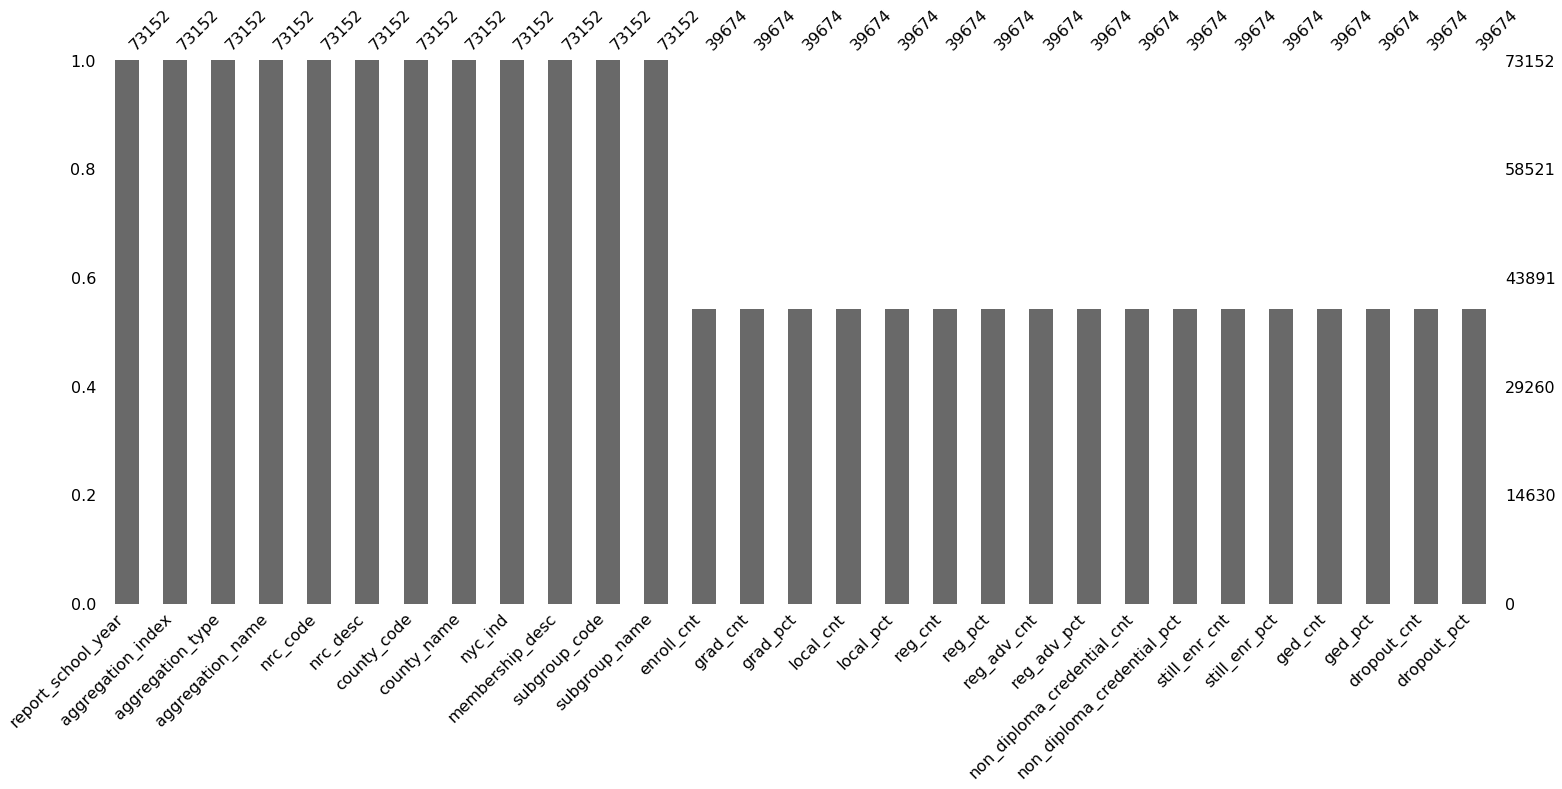

In [8]:
#Visualize the amount of missing data using missingno's bar chart
msno.bar(df);

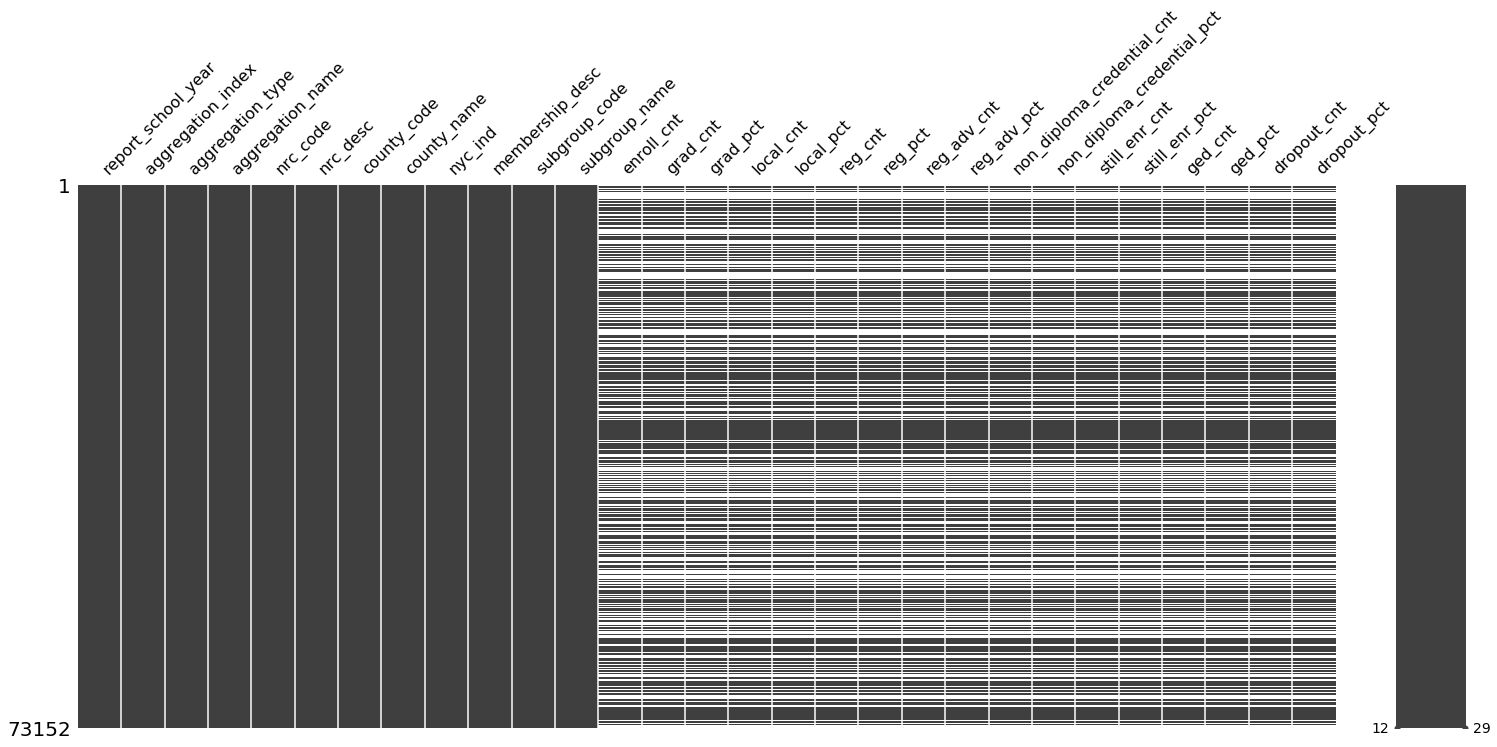

In [9]:
#Use missingnos matrix to see if there is a pattern to the missing data
ax = msno.matrix(df)
ax.get_figure();

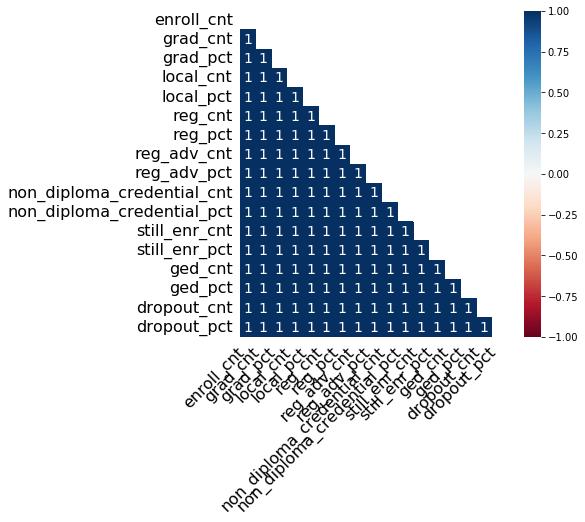

In [10]:
#Graph a heat map of the missing data to see if the locations where the data are missing are correlated.
ax = msno.heatmap(df, figsize = (6,6))
ax.get_figure(); 

We see that there is a pattern to our missing data.  Since the missing values are not random, we will drop all rows that have missing data instead of imputing the missing values.

In [11]:
#Get summary statistics for each numeric variable including mean, standard deviation, minimum, maximum, and quartiles
df.describe()

aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code    enroll_cnt      grad_cnt      grad_pct     local_cnt  \
count   73152.000000  39674.000000  39674.000000  39674.000000  39674.000000   
mean       12.000930    192.120079    161.178354     84.406614     12.340903   
std         7.213138    439.972474    361.294773     15.679500     32.046302   
min         1.000000      5.000000      0.000000      0.000000      0.000000   
25%         6.000000     25.000000     20.000000     79.000000      1.000000   
50%        11.000000     66.000000     57.000000     89.000000      4.000000   
75%        18.000000    179.000000    156.000000     95.000000     10.000000   
max        25.000000   9176.000000   7540.000000    100.000000    557.000000   

          local_pct  ...   reg_adv_cnt   reg_adv_pct  \
count  39674.000000  ...  39674.000000  39674.000000   
mean       8.479936  ...     62.032742     32.577204   
std       10.398486  ...    132.777866     23.001197   
min        0.000000  ...      0.000000      0.000000   
25%        2.000000  ...      4.000000     14.000000   
50%        6.000000  ...     18.000000     31.000000   
75%       11.000000  ...     62.000000     49.000000   
max      100.000000  ...   2231.000000    100.000000   

       non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
count                39674.000000                39674.000000   39674.000000   
mean                     1.924485                    1.742627      11.299516   
std                      6.498913                    4.063987      40.766672   
min                      0.000000                    0.000000       0.000000   
25%                      0.000000                    0.000000       0.000000   
50%                      0.000000                    0.000000       2.000000   
75%                      2.000000                    2.000000       5.000000   
max                    279.000000                   67.000000    1381.000000   

       still_enr_pct       ged_cnt       ged_pct   dropout_cnt   dropout_pct  
count   39674.000000  39674.000000  39674.000000  39674.000000  39674.000000  
mean        5.190704      1.377577      0.612693     16.239225      7.963049  
std         8.832710      4.949389      1.985445     50.129834      9.658698  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000      1.000000      1.000000  
50%         2.000000      0.000000      0.000000      3.000000      5.000000  
75%         6.000000      1.000000      0.000000      9.000000     11.000000  
max       100.000000     97.000000     67.000000   1091.000000    100.000000  

[8 rows x 22 columns]

Aggregation_index only has the value of 3.<br>
Categorical attributes include nrc_code, county_code, nyc_ind, and subgroup_code.<br> 
There are no negative values in the data set which is what we would expect. 

In [12]:
#Check for duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [report_school_year, aggregation_index, aggregation_type, aggregation_name, nrc_code, nrc_desc, county_code, county_name, nyc_ind, membership_desc, subgroup_code, subgroup_name, enroll_cnt, grad_cnt, grad_pct, local_cnt, local_pct, reg_cnt, reg_pct, reg_adv_cnt, reg_adv_pct, non_diploma_credential_cnt, non_diploma_credential_pct, still_enr_cnt, still_enr_pct, ged_cnt, ged_pct, dropout_cnt, dropout_pct]
Index: []

[0 rows x 29 columns]

There are no duplicate values.

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

In [13]:
#Create lists of numerical and categorical attributes

col_cat=['report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 'nrc_code', 'nrc_desc', 
         'county_code', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code', 'subgroup_name']

col_num=['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
         'non_diploma_credential_cnt', 'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct',
         'dropout_cnt', 'dropout_pct']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numeric attributes:%s" %len(col_num))

# of categorical attributes:12
# of numeric attributes:17


<h4><b>Bar Charts, Histograms and Boxplots</b></h4>

Plot a bar chart for each of the categorical attributes.

C:\Users\aimhoff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  app.launch_new_instance()


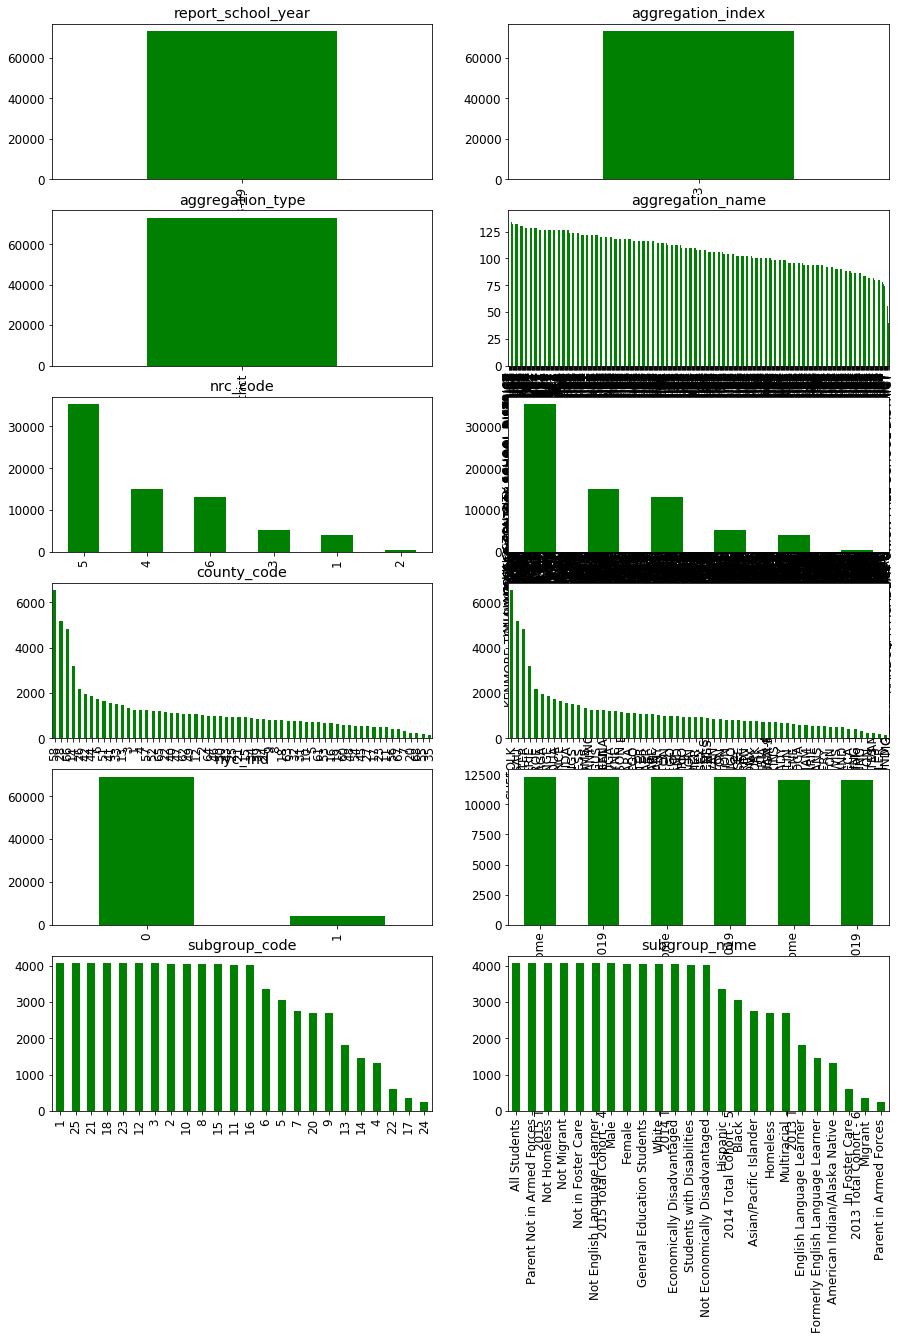

In [14]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(6,2,j) 
    df[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) report_school_year only has one observation.<br>
2) aggregation_index only has one observation. <br>
3) aggregation_type only has one observation. <br>
4) The most common observation for aggregation_name is Kingston City School District. <br>
5) The most common observation for nrc_code is 5.<br>
6) The most common observation for nrc_desc is Average Needs. <br>
7) The most common observation for county_code is 58. <br>
8) The most common observation for county_name is Suffolk. <br>
9) The most common observation for nyc_ind is 0 which means not in NYC.<br>
10) The most common observations for membership_desc is 2015 Total Cohort - 4 Year Outcome - August 2019 and 2015 Total Cohort - 4 Year Outcome.
11) The most common observations for subgroup_code is 1, 18, 21, 25.<br>
12) The most common observations for subgroup_name is All Students, Not Migrant, Not Homeless, and Parent Not in Armed Forces.<br>

Let's take a closer look at membership_desc.

In [15]:
print(df['membership_desc'].value_counts())

2015 Total Cohort - 4 Year Outcome                  12299
2015 Total Cohort - 4 Year Outcome - August 2019    12299
2014 Total Cohort - 5 Year Outcome                  12257
2014 Total Cohort - 5 Year Outcome - August 2019    12257
2013 Total Cohort - 6 Year Outcome                  12020
2013 Total Cohort - 6 Year Outcome - August 2019    12020
Name: membership_desc, dtype: int64


By looking more closely at the [SIRS-201 - Total Cohort - Summary](http://www.p12.nysed.gov/irs/level2reports/reportguides.html), we see that the 4, 5, and 6 year outcomes are for June and August, even though they are not labeled that way in our data set.  We don't want to keep both rows since the numbers are similar.

Plot a histogram for each of our numerical attributes.

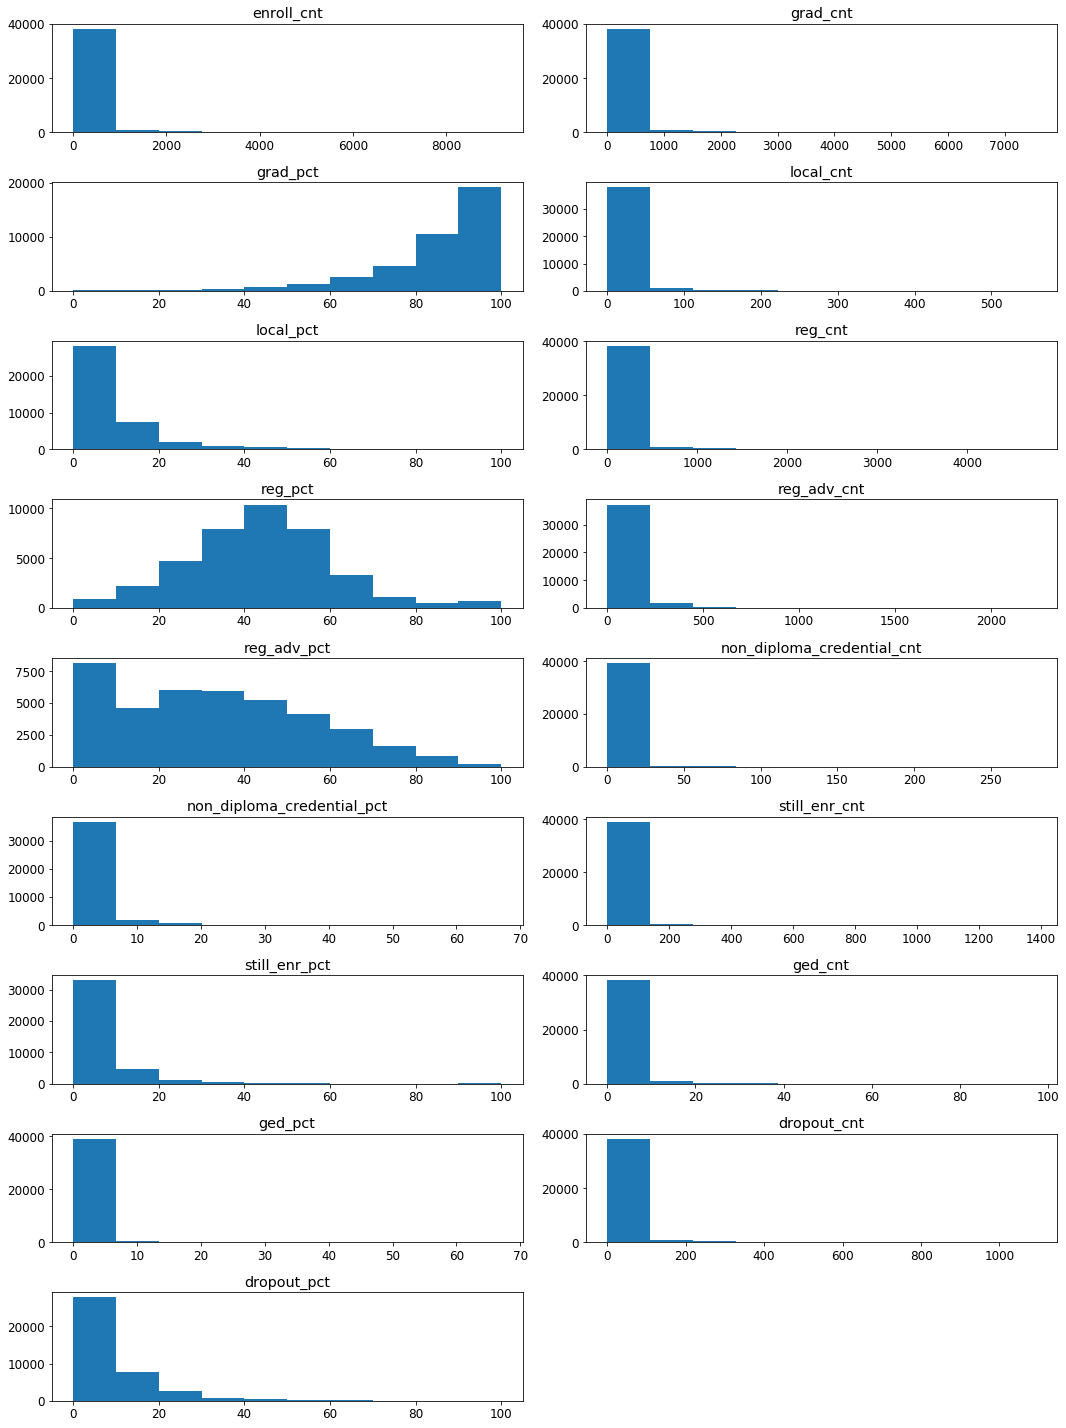

In [16]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(9,2,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) enroll_cnt is right-skewed. It has 1,464 unique values with a mode of 5, a median of 66, and a mean of 192.<br>
2) grad_cnt is right-skewed. It has 1,714 unique values with a mode of 5, a median of 57, and a mean of 161.<br>
3) grad_pct is left-skewed.  It has 100 unique values with a mode of 100, a median of 89, and a mean of 84. <br>
4) local_cnt is right-skewed. It has 332 unique values with a mode of 0, a median of 4, and a mean of 12.<br>
5) local_pct is right-skewed. It has 81 unique values with a mode of 0, a median of 6, and a mean of 8.<br>
6) reg_cnt is right-skewed. It has 1,290 unique values with a mode of 3, a median of 27, and a mean of 87.<br>
7) reg_pct is pretty evenly distributed. It has 102 unique values with a mode of 50, a median of 43, and a mean of 43.<br>
8) reg_adv_cnt is right-skewed. It has 782 unique values with a mode of 0, a median of 18, and a mean of 62.<br>
9) reg_adv_pct is right-skewed. It has 100 unique values with a mode of 0, a median of 31, and a mean of 33.<br>
10) non_diploma_credential_cnt is right-skewed. It has 76 unique values with a mode of 0, a median of 0, and a mean of 2.<br>
11) non_diploma_credential_pct is right-skewed. It has 47 unique values with a mode of 0, a median of 0, and a mean of 2.<br>
12) still_enr_cnt is right-skewed. It has 408 unique values with a mode of 0, a median of 2, and a mean of 11.<br>
13) still_enr_pct is right-skewed. It has 85 unique values with a mode of 0, a median of 2, and a mean of 5.<br>
14) ged_cnt is right-skewed. It has 78 unique values with a mode of 0, a median of 0, and a mean of 1.<br>
15) ged_pct is right-skewed. It has 32 unique values with a mode of 0, a median of 0, and a mean of 1.<br>
16) dropout_cnt is right-skewed. It has 445 unique values with a mode of 0, a median of 3, and a mean of 16.<br>
17) dropout_pct is right-skewed. It has 81 unique values with a mode of 0, a median of 5, and a mean of 8.<br>

We will now check the boxplots for outliers.

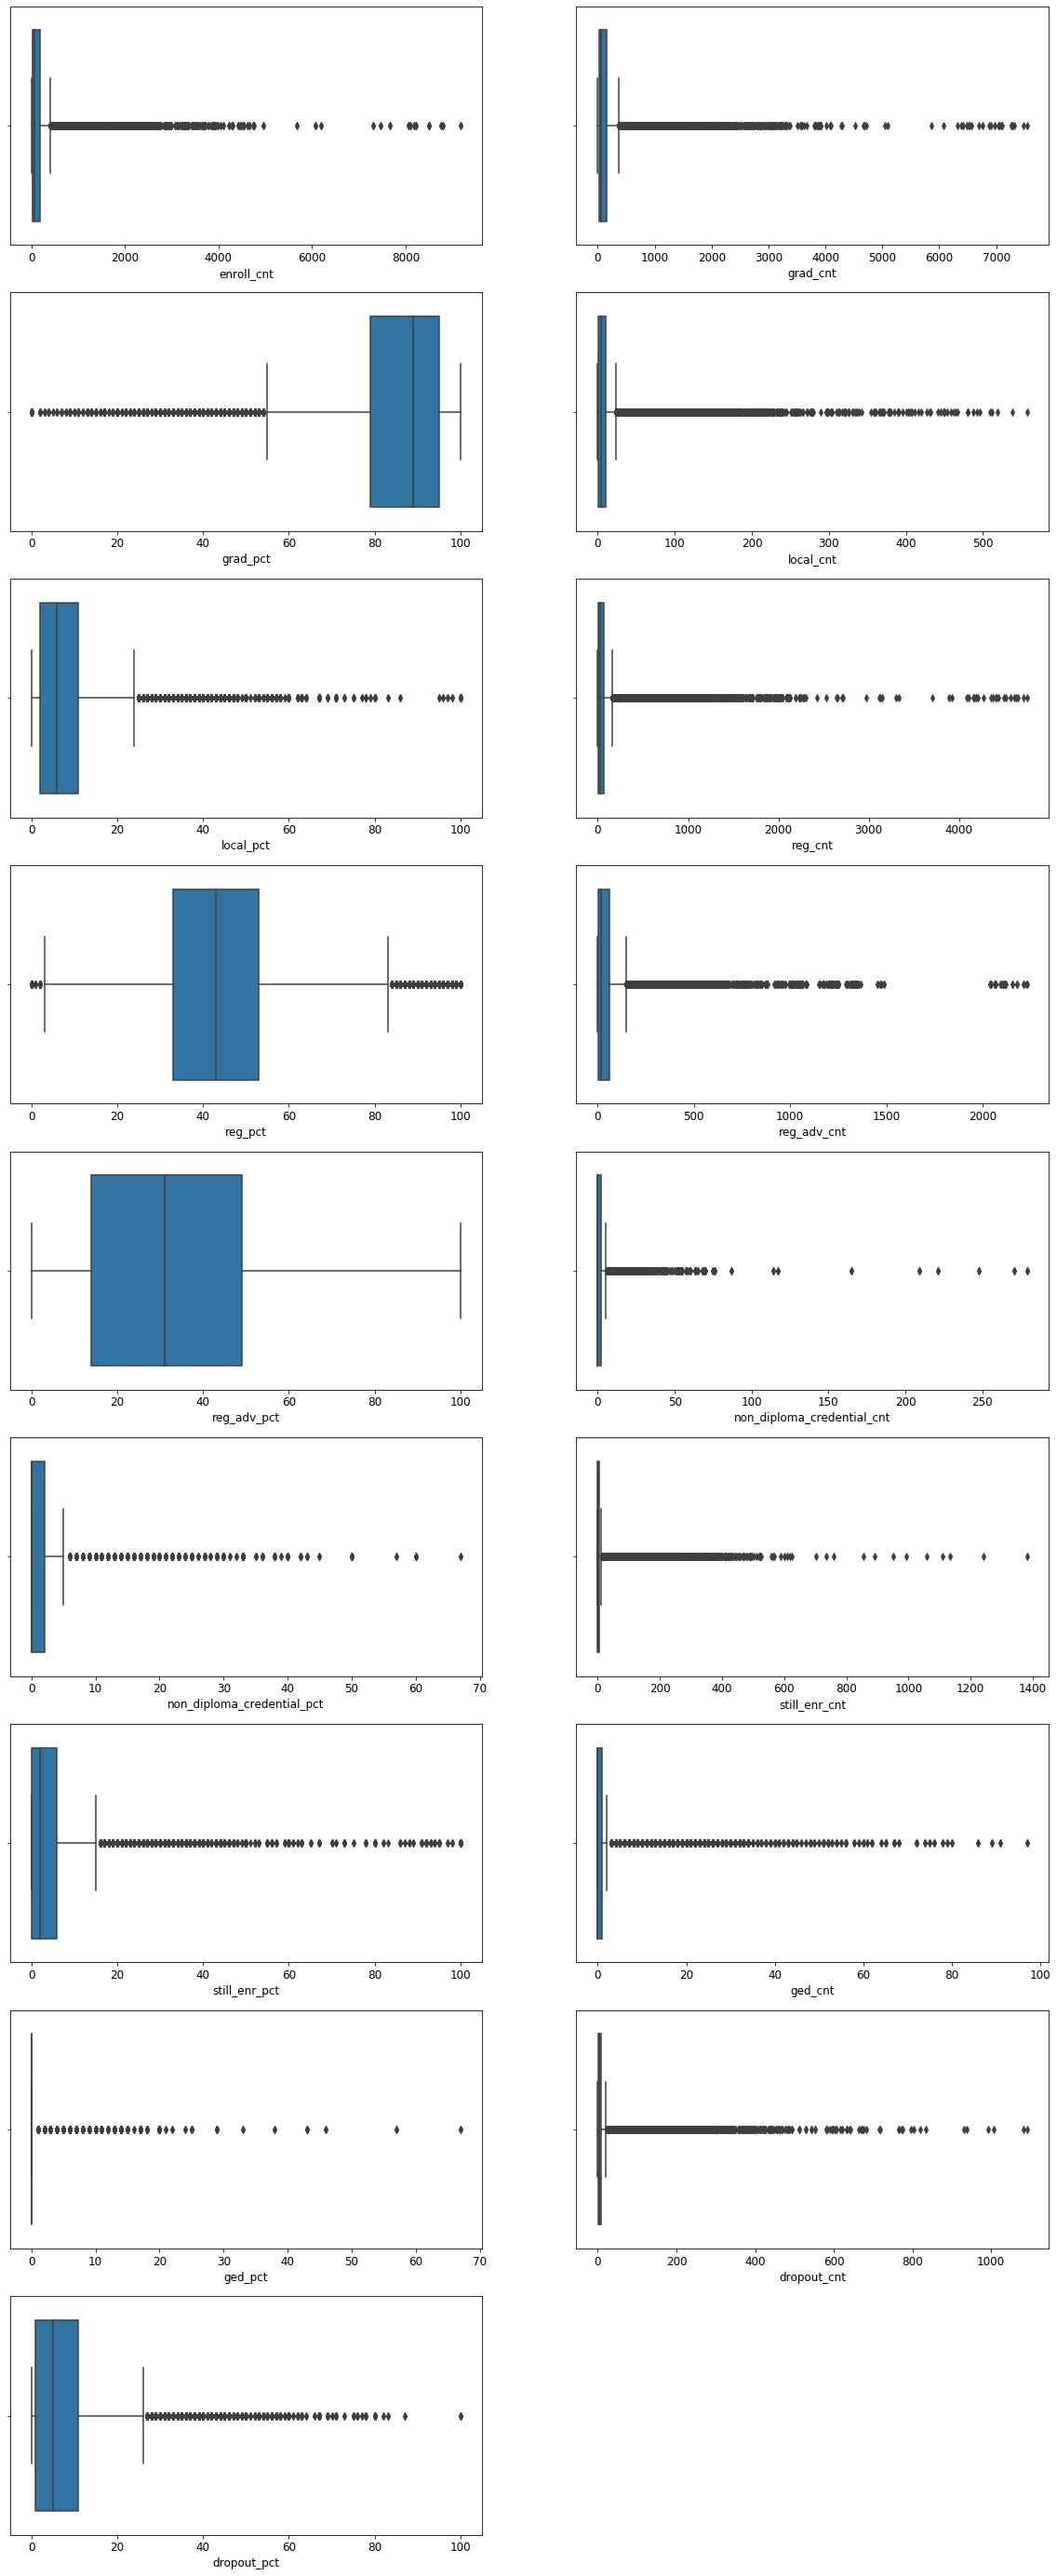

In [17]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,50))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(9,2,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

We see that our data has a lot of outliers.  

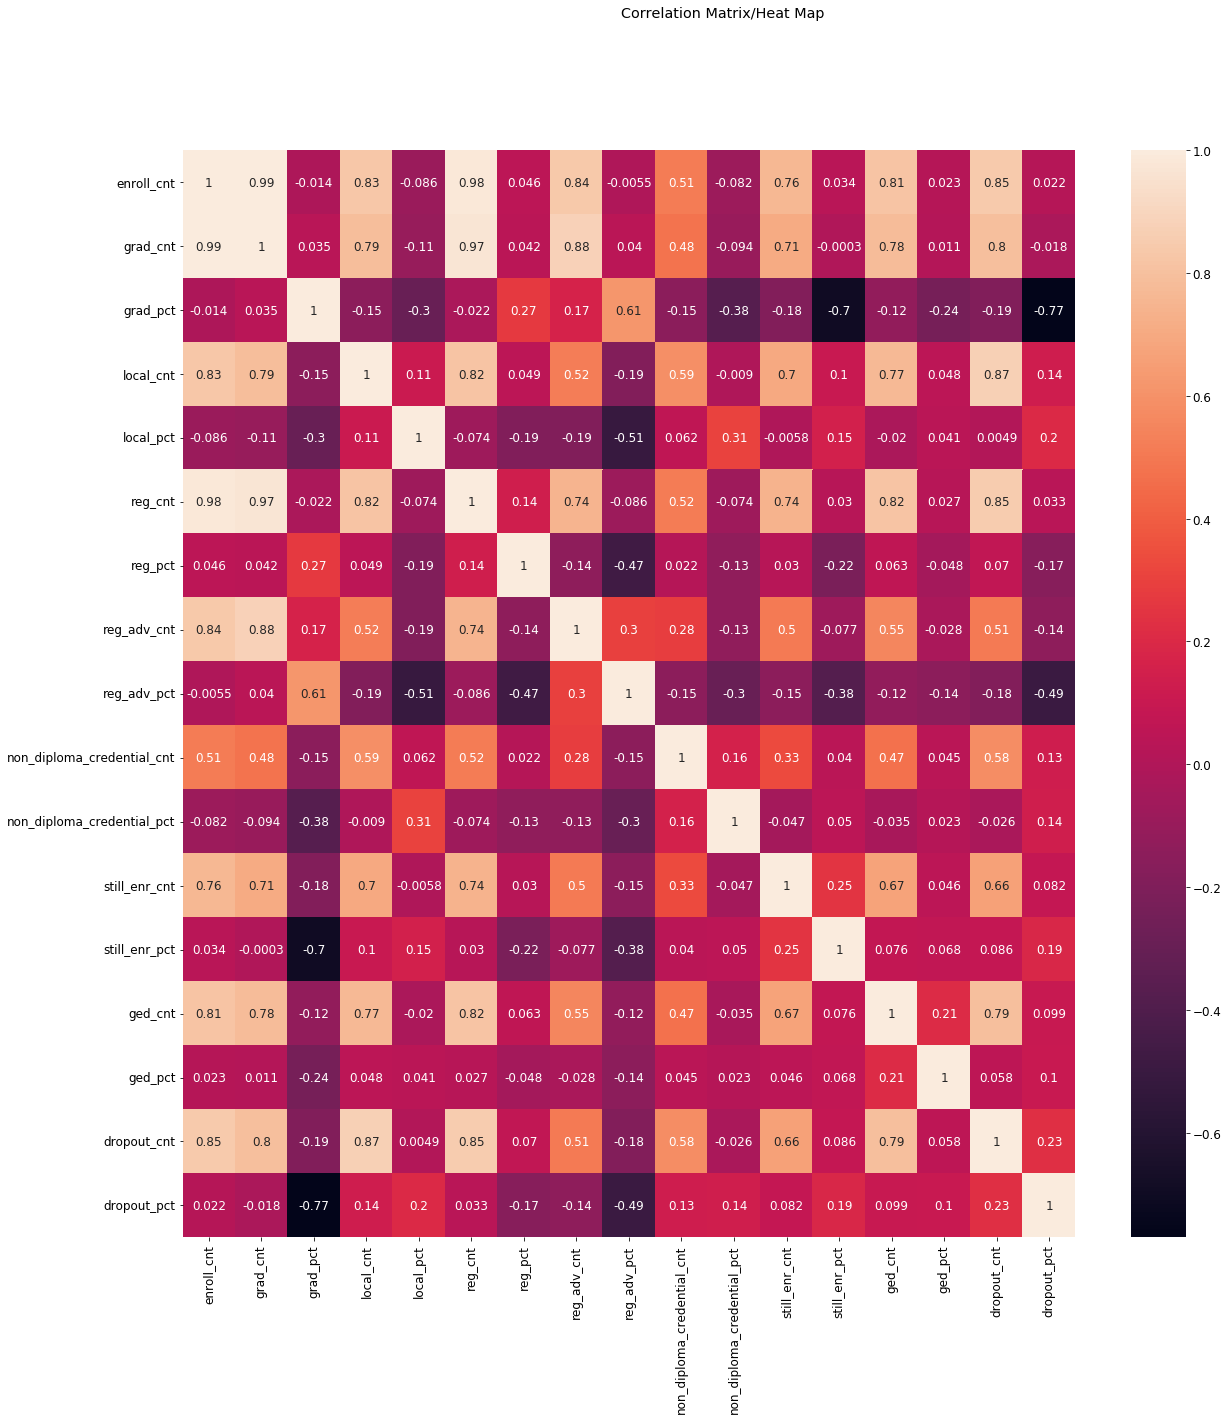

In [18]:
#Graph heat map for correlation
corr_num=df[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

1) Enroll_cnt is highly correlated with grad_cnt, local_cnt, reg_cnt, reg_adv_cnt, still_enr_cnt, ged_cnt and dropout_cnt.<br>
2) Grad_cnt is highly correlated with local_cnt, reg_cnt, reg_adv_cnt, still_enr_cnt, ged_cnt and dropout_cnt.<br>
3) Grad_pct is highly correlated with dropout_pct.<br>
4) Local_cnt is highly correlated with reg_cnt, ged_cnt and dropout_cnt.<br>
5) Reg_cnt is highly correlated with ged_cnt and dropout_cnt.<br>
6) Ged_cnt is highly correlated with dropout_cnt.<br>

<h3><b>Data Preparation</b></h3>

Create new categorical indicator variable which will be the response variable. First, find the median of reg_pct.

In [19]:
df['reg_pct'].median()

43.0

Add a column called 'reg_pct_level' with Low if reg_pct is less than 1/2 the median, High if reg_pct is 1.5 times the median, and Medium if reg_pct is greater than 1/2 the median but less than 1.5 times the median.

In [20]:
numbers = df['reg_pct']

df.loc[df['reg_pct'] < (43/2), 'reg_pct_level'] = 'Low' 
df.loc[df['reg_pct'] > (43*1.5), 'reg_pct_level'] = 'High' 
df.loc[(df['reg_pct'] > (43/2)) & (df['reg_pct'] < (43*1.5)), 'reg_pct_level'] = 'Medium' 

print(df)

      report_school_year  aggregation_index aggregation_type  \
0                2018-19                  3         District   
1                2018-19                  3         District   
2                2018-19                  3         District   
3                2018-19                  3         District   
4                2018-19                  3         District   
...                  ...                ...              ...   
73147            2018-19                  3         District   
73148            2018-19                  3         District   
73149            2018-19                  3         District   
73150            2018-19                  3         District   
73151            2018-19                  3         District   

                     aggregation_name  nrc_code                   nrc_desc  \
0         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1         ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs 

Analyze the distribution of the newly created reg_pct_level indicator value.

In [21]:
df['reg_pct_level'].value_counts()

Medium    32258
Low        3915
High       3501
Name: reg_pct_level, dtype: int64

We see that the three response variables are unbalanced.  There are 39,674 rows with a reg_pct_level value.  Medium is 81%, Low is 10%, and High makes up 9% of the total reg_pct_level values.  Once we drop the missing values in the data set, this number should match the number of rows in the dataset which we will see below.

Remove reg_cnt and reg_pct to eliminate the collinearity that will result from the addition of the reg_pct_level indicator.

In [22]:
#Drop reg_cnt and reg_pct
df = df.drop(df.columns[[17, 18]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_pct non_diploma_credential_cnt  non_diploma_credential_pct  \
0         14.0                       16.0                         2.0   
1         15.0                        2.0                         1.0   
2         13.0                       14.0                         4.0   
3          NaN                        NaN                         NaN   
4          6.0                       10.0                         3.0   

   still_enr_cnt  still_enr_pct  ged_cnt  ged_pct  dropout_cnt  dropout_pct  \
0           30.0            5.0      0.0      0.0        148.0         22.0   
1           11.0            3.0      0.0      0.0         65.0         20.0   
2           19.0            6.0      0.0      0.0         83.0         25.0   
3            NaN            NaN      NaN      NaN          NaN          NaN   
4           18.0            5.0      0.0      0.0         91.0         25.0   

   reg_pct_level  
0         Medium  
1         Medium  
2         Medium  
3            NaN  
4         Medium  

[5 rows x 28 columns]

Remove rows with missing values.

In [23]:
#Drop the rows with missing values
df = df.dropna()

#Check results
df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
4            2018-19                  3         District   
5            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
5  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
5            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_pct non_diploma_credential_cnt  non_diploma_credential_pct  \
0         14.0                       16.0                         2.0   
1         15.0                        2.0                         1.0   
2         13.0                       14.0                         4.0   
4          6.0                       10.0                         3.0   
5          5.0                        4.0                         4.0   

   still_enr_cnt  still_enr_pct  ged_cnt  ged_pct  dropout_cnt  dropout_pct  \
0           30.0            5.0      0.0      0.0        148.0         22.0   
1           11.0            3.0      0.0      0.0         65.0         20.0   
2           19.0            6.0      0.0      0.0         83.0         25.0   
4           18.0            5.0      0.0      0.0         91.0         25.0   
5            8.0            8.0      0.0      0.0         28.0         29.0   

   reg_pct_level  
0         Medium  
1         Medium  
2         Medium  
4         Medium  
5         Medium  

[5 rows x 28 columns]

In [24]:
#Find the number of rows and columns in the data set.
print(df.shape)

(39674, 28)


By removing the rows with missing values, we went from 73,152 rows to 39,674 rows.  This confirms that a reg_pct_level value was calculated for each observation in our data set.

report_school_year, aggregation_index, and aggregation_type only have one value in each column so we will drop those three columns.

In [25]:
#Drop report_school_year, aggregation_index, and aggregation_type columns since they are non-predictive.
df = df.drop(df.columns[[0, 1, 2]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
5  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
5            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code subgroup_name  enroll_cnt  ...  reg_adv_pct  \
0              1  All Students       658.0  ...         14.0   
1              2        Female       324.0  ...         15.0   
2              3          Male       334.0  ...         13.0   
4              5         Black       367.0  ...          6.0   
5              6      Hispanic        98.0  ...          5.0   

   non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
0                        16.0                         2.0           30.0   
1                         2.0                         1.0           11.0   
2                        14.0                         4.0           19.0   
4                        10.0                         3.0           18.0   
5                         4.0                         4.0            8.0   

   still_enr_pct  ged_cnt  ged_pct  dropout_cnt  dropout_pct  reg_pct_level  
0            5.0      0.0      0.0        148.0         22.0         Medium  
1            3.0      0.0      0.0         65.0         20.0         Medium  
2            6.0      0.0      0.0         83.0         25.0         Medium  
4            5.0      0.0      0.0         91.0         25.0         Medium  
5            8.0      0.0      0.0         28.0         29.0         Medium  

[5 rows x 25 columns]

Let's drop nrc_code, county_code, and subgroup_code since these categorical values have corresponding categorical names.

In [26]:
#Drop nrc_code, county_code, and subgroup_code columns since they have corresponding categorical values.
df = df.drop(df.columns[[1, 3, 7]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

aggregation_name                   nrc_desc county_name  \
0  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
1  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
2  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
4  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
5  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

   nyc_ind                     membership_desc subgroup_name  enroll_cnt  \
0        0  2013 Total Cohort - 6 Year Outcome  All Students       658.0   
1        0  2013 Total Cohort - 6 Year Outcome        Female       324.0   
2        0  2013 Total Cohort - 6 Year Outcome          Male       334.0   
4        0  2013 Total Cohort - 6 Year Outcome         Black       367.0   
5        0  2013 Total Cohort - 6 Year Outcome      Hispanic        98.0   

   grad_cnt  grad_pct  local_cnt  ...  reg_adv_pct  \
0     464.0      71.0       63.0  ...         14.0   
1     246.0      76.0       30.0  ...         15.0   
2     218.0      65.0       33.0  ...         13.0   
4     248.0      68.0       42.0  ...          6.0   
5      58.0      59.0       13.0  ...          5.0   

   non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
0                        16.0                         2.0           30.0   
1                         2.0                         1.0           11.0   
2                        14.0                         4.0           19.0   
4                        10.0                         3.0           18.0   
5                         4.0                         4.0            8.0   

   still_enr_pct  ged_cnt  ged_pct  dropout_cnt  dropout_pct  reg_pct_level  
0            5.0      0.0      0.0        148.0         22.0         Medium  
1            3.0      0.0      0.0         65.0         20.0         Medium  
2            6.0      0.0      0.0         83.0         25.0         Medium  
4            5.0      0.0      0.0         91.0         25.0         Medium  
5            8.0      0.0      0.0         28.0         29.0         Medium  

[5 rows x 22 columns]

For membership_desc, we will keep the rows from August. Remove all rows for which the membership_desc is 2013 Total Cohort - 6 Year Outcome, 2014 Total Cohort - 5 Year Outcome, or 2015 Total Cohort - 4 Year Outcome.

In [27]:
index_names = df[(df['membership_desc'] == '2013 Total Cohort - 6 Year Outcome')].index
df.drop(index_names, inplace = True)

index_names = df[(df['membership_desc'] == '2014 Total Cohort - 5 Year Outcome')].index
df.drop(index_names, inplace = True)

index_names = df[(df['membership_desc'] == '2015 Total Cohort - 4 Year Outcome')].index
df.drop(index_names, inplace = True)

#View the data frame to ensure that the rows were removed
df.head()

aggregation_name                   nrc_desc county_name  \
66  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
67  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
68  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
70  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
71  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

    nyc_ind                                   membership_desc subgroup_name  \
66        0  2014 Total Cohort - 5 Year Outcome - August 2019  All Students   
67        0  2014 Total Cohort - 5 Year Outcome - August 2019        Female   
68        0  2014 Total Cohort - 5 Year Outcome - August 2019          Male   
70        0  2014 Total Cohort - 5 Year Outcome - August 2019         Black   
71        0  2014 Total Cohort - 5 Year Outcome - August 2019      Hispanic   

    enroll_cnt  grad_cnt  grad_pct  local_cnt  ...  reg_adv_pct  \
66       678.0     482.0      71.0       65.0  ...         15.0   
67       335.0     259.0      77.0       30.0  ...         18.0   
68       343.0     223.0      65.0       35.0  ...         12.0   
70       356.0     240.0      67.0       48.0  ...          5.0   
71       109.0      81.0      74.0       12.0  ...         10.0   

    non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
66                        14.0                         2.0           35.0   
67                         3.0                         1.0           14.0   
68                        11.0                         3.0           21.0   
70                        10.0                         3.0           19.0   
71                         0.0                         0.0            5.0   

    still_enr_pct  ged_cnt  ged_pct  dropout_cnt  dropout_pct  reg_pct_level  
66            5.0      7.0      1.0        140.0         21.0         Medium  
67            4.0      5.0      1.0         54.0         16.0         Medium  
68            6.0      2.0      1.0         86.0         25.0         Medium  
70            5.0      6.0      2.0         81.0         23.0         Medium  
71            5.0      1.0      1.0         22.0         20.0         Medium  

[5 rows x 22 columns]

In [28]:
#Print the shape of the data frame
print (df.shape)

(19837, 22)


By removing the rows from June, we went from 39,674 rows to 19,837 rows.

In [29]:
#View the value counts to make sure the June rows were deleted as expected
print(df['membership_desc'].value_counts())

2015 Total Cohort - 4 Year Outcome - August 2019    6676
2014 Total Cohort - 5 Year Outcome - August 2019    6640
2013 Total Cohort - 6 Year Outcome - August 2019    6521
Name: membership_desc, dtype: int64


We are only left with the August observations so let's remove the membership_desc column from the data set.

In [30]:
#Drop membership_desc
df = df.drop(df.columns[[4]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

aggregation_name                   nrc_desc county_name  \
66  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
67  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
68  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
70  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
71  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

    nyc_ind subgroup_name  enroll_cnt  grad_cnt  grad_pct  local_cnt  \
66        0  All Students       678.0     482.0      71.0       65.0   
67        0        Female       335.0     259.0      77.0       30.0   
68        0          Male       343.0     223.0      65.0       35.0   
70        0         Black       356.0     240.0      67.0       48.0   
71        0      Hispanic       109.0      81.0      74.0       12.0   

    local_pct  ...  reg_adv_pct  non_diploma_credential_cnt  \
66       10.0  ...         15.0                        14.0   
67        9.0  ...         18.0                         3.0   
68       10.0  ...         12.0                        11.0   
70       13.0  ...          5.0                        10.0   
71       11.0  ...         10.0                         0.0   

    non_diploma_credential_pct  still_enr_cnt  still_enr_pct  ged_cnt  \
66                         2.0           35.0            5.0      7.0   
67                         1.0           14.0            4.0      5.0   
68                         3.0           21.0            6.0      2.0   
70                         3.0           19.0            5.0      6.0   
71                         0.0            5.0            5.0      1.0   

    ged_pct  dropout_cnt  dropout_pct  reg_pct_level  
66      1.0        140.0         21.0         Medium  
67      1.0         54.0         16.0         Medium  
68      1.0         86.0         25.0         Medium  
70      2.0         81.0         23.0         Medium  
71      1.0         22.0         20.0         Medium  

[5 rows x 21 columns]

We do not need counts and percentages for the numeric columns since they refer to the same data.  We will drop the percent columns.

In [31]:
#Drop grad_pct, local_pct, reg_adv_pct, non_diploma_credential_pct, still_enr_pct, ged_pct, and dropout_pct.
df = df.drop(df.columns[[7, 9, 11, 13, 15, 17, 19]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

aggregation_name                   nrc_desc county_name  \
66  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
67  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
68  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
70  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
71  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

    nyc_ind subgroup_name  enroll_cnt  grad_cnt  local_cnt  reg_adv_cnt  \
66        0  All Students       678.0     482.0       65.0        101.0   
67        0        Female       335.0     259.0       30.0         59.0   
68        0          Male       343.0     223.0       35.0         42.0   
70        0         Black       356.0     240.0       48.0         17.0   
71        0      Hispanic       109.0      81.0       12.0         11.0   

    non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt  \
66                        14.0           35.0      7.0        140.0   
67                         3.0           14.0      5.0         54.0   
68                        11.0           21.0      2.0         86.0   
70                        10.0           19.0      6.0         81.0   
71                         0.0            5.0      1.0         22.0   

   reg_pct_level  
66        Medium  
67        Medium  
68        Medium  
70        Medium  
71        Medium

The subgroup_code 1 is for all students while 2 is for female and 3 is for male.  Female + Male = All Student 98% of the time in this data set so having all three listed is redundant.  We will remove the subgroup_name "All Students" from the data set.

In [32]:
#Drop subgroup_name All Students
index_names = df[(df['subgroup_name'] == "All Students")].index
df.drop(index_names, inplace = True)

#View the data frame to ensure that the rows were removed
df.head()

aggregation_name                   nrc_desc county_name  \
67  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
68  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
70  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
71  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
72  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

    nyc_ind           subgroup_name  enroll_cnt  grad_cnt  local_cnt  \
67        0                  Female       335.0     259.0       30.0   
68        0                    Male       343.0     223.0       35.0   
70        0                   Black       356.0     240.0       48.0   
71        0                Hispanic       109.0      81.0       12.0   
72        0  Asian/Pacific Islander        53.0      44.0        1.0   

    reg_adv_cnt  non_diploma_credential_cnt  still_enr_cnt  ged_cnt  \
67         59.0                         3.0           14.0      5.0   
68         42.0                        11.0           21.0      2.0   
70         17.0                        10.0           19.0      6.0   
71         11.0                         0.0            5.0      1.0   
72         16.0                         1.0            2.0      0.0   

    dropout_cnt reg_pct_level  
67         54.0        Medium  
68         86.0        Medium  
70         81.0        Medium  
71         22.0        Medium  
72          6.0        Medium

In [33]:
#Print the shape of the data frame
print (df.shape)

(17814, 14)


By removing subgroup_name All Students, we went from 19,837 rows to 17,814.

Drop columns that are highly correlated (>0.75) with enroll_cnt which are grad_cnt, local_cnt, reg_adv_cnt, still_enr_cnt, ged_cnt and dropout_cnt.

In [34]:
#Drop grad_cnt, local_cnt, reg_adv_cnt, still_enr_cnt, ged_cnt and dropout_cnt.
df2 = df.drop(df.columns[[6, 7, 8, 10, 11, 12]], axis=1)

#View the data frame to ensure that the columns were removed.
df2.head()

aggregation_name                   nrc_desc county_name  \
67  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
68  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
70  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
71  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   
72  ALBANY CITY SCHOOL DISTRICT  Urban-Suburban High Needs      ALBANY   

    nyc_ind           subgroup_name  enroll_cnt  non_diploma_credential_cnt  \
67        0                  Female       335.0                         3.0   
68        0                    Male       343.0                        11.0   
70        0                   Black       356.0                        10.0   
71        0                Hispanic       109.0                         0.0   
72        0  Asian/Pacific Islander        53.0                         1.0   

   reg_pct_level  
67        Medium  
68        Medium  
70        Medium  
71        Medium  
72        Medium

Create dummy variables for the categorial variables.

In [35]:
#Get dummies
cat_dum=pd.get_dummies(df2.aggregation_name, drop_first = False)

#Display first 5 rows
cat_dum.head()

ADDISON CENTRAL SCHOOL DISTRICT  ADIRONDACK CENTRAL SCHOOL DISTRICT  \
67                                0                                   0   
68                                0                                   0   
70                                0                                   0   
71                                0                                   0   
72                                0                                   0   

    AFTON CENTRAL SCHOOL DISTRICT  AKRON CENTRAL SCHOOL DISTRICT  \
67                              0                              0   
68                              0                              0   
70                              0                              0   
71                              0                              0   
72                              0                              0   

    ALBANY CITY SCHOOL DISTRICT  ALBION CENTRAL SCHOOL DISTRICT  \
67                            1                               0   
68                            1                               0   
70                            1                               0   
71                            1                               0   
72                            1                               0   

    ALDEN CENTRAL SCHOOL DISTRICT  ALEXANDER CENTRAL SCHOOL DISTRICT  \
67                              0                                  0   
68                              0                                  0   
70                              0                                  0   
71                              0                                  0   
72                              0                                  0   

    ALEXANDRIA CENTRAL SCHOOL DISTRICT  ALFRED-ALMOND CENTRAL SCHOOL DISTRICT  \
67                                   0                                      0   
68                                   0                                      0   
70                                   0                                      0   
71                                   0                                      0   
72                                   0                                      0   

    ...  WILLSBORO CENTRAL SCHOOL DISTRICT  WILSON CENTRAL SCHOOL DISTRICT  \
67  ...                                  0                               0   
68  ...                                  0                               0   
70  ...                                  0                               0   
71  ...                                  0                               0   
72  ...                                  0                               0   

    WINDHAM-ASHLAND-JEWETT CENTRAL SCHOOL DISTRICT  \
67                                               0   
68                                               0   
70                                               0   
71                                               0   
72                                               0   

    WINDSOR CENTRAL SCHOOL DISTRICT  WORCESTER CENTRAL SCHOOL DISTRICT  \
67                                0                                  0   
68                                0                                  0   
70                                0                                  0   
71                                0                                  0   
72                                0                                  0   

    WYANDANCH UNION FREE SCHOOL DISTRICT  YONKERS CITY SCHOOL DISTRICT  \
67                                     0                             0   
68                                     0                             0   
70                                     0                             0   
71                                     0                             0   
72                                     0                             0   

    YORK CENTRAL SCHOOL DISTRICT  YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT  \
67                             0                          

In [36]:
#Get dummies
cat_dum2=pd.get_dummies(df2.nrc_desc, drop_first = False)

#Display first 5 rows
cat_dum2.head()

Average Needs  Buffalo  Rochester  Yonkers  Syracuse  Low Needs  NYC  \
67              0                                      0          0    0   
68              0                                      0          0    0   
70              0                                      0          0    0   
71              0                                      0          0    0   
72              0                                      0          0    0   

    Rural High Needs  Urban-Suburban High Needs  
67                 0                          1  
68                 0                          1  
70                 0                          1  
71                 0                          1  
72                 0                          1

In [37]:
#Get dummies
cat_dum3=pd.get_dummies(df2.county_name, drop_first = False)

#Display first 5 rows
cat_dum3.head()

ALBANY  ALLEGANY  BRONX  BROOME  CATTARAUGUS  CAYUGA  CHAUTAUQUA  CHEMUNG  \
67       1         0      0       0            0       0           0        0   
68       1         0      0       0            0       0           0        0   
70       1         0      0       0            0       0           0        0   
71       1         0      0       0            0       0           0        0   
72       1         0      0       0            0       0           0        0   

    CHENANGO  CLINTON  ...  SULLIVAN  TIOGA  TOMPKINS  ULSTER  WARREN  \
67         0        0  ...         0      0         0       0       0   
68         0        0  ...         0      0         0       0       0   
70         0        0  ...         0      0         0       0       0   
71         0        0  ...         0      0         0       0       0   
72         0        0  ...         0      0         0       0       0   

    WASHINGTON  WAYNE  WESTCHESTER  WYOMING  YATES  
67           0      0            0        0      0  
68           0      0            0        0      0  
70           0      0            0        0      0  
71           0      0            0        0      0  
72           0      0            0        0      0  

[5 rows x 62 columns]

In [38]:
#Get dummies
cat_dum4=pd.get_dummies(df2.subgroup_name, drop_first = False)

#Display first 5 rows
cat_dum4.head()

American Indian/Alaska Native  Asian/Pacific Islander  Black  \
67                              0                       0      0   
68                              0                       0      0   
70                              0                       0      1   
71                              0                       0      0   
72                              0                       1      0   

    Economically Disadvantaged  English Language Learner  Female  \
67                           0                         0       1   
68                           0                         0       0   
70                           0                         0       0   
71                           0                         0       0   
72                           0                         0       0   

    Formerly English Language Learner  General Education Students  Hispanic  \
67                                  0                           0         0   
68                                  0                           0         0   
70                                  0                           0         0   
71                                  0                           0         1   
72                                  0                           0         0   

    Homeless  ...  Multiracial  Not Economically Disadvantaged  \
67         0  ...            0                               0   
68         0  ...            0                               0   
70         0  ...            0                               0   
71         0  ...            0                               0   
72         0  ...            0                               0   

    Not English Language Learner  Not Homeless  Not Migrant  \
67                             0             0            0   
68                             0             0            0   
70                             0             0            0   
71                             0             0            0   
72                             0             0            0   

    Not in Foster Care  Parent Not in Armed Forces  Parent in Armed Forces  \
67                   0                           0                       0   
68                   0                           0                       0   
70                   0                           0                       0   
71                   0                           0                       0   
72                   0                           0                       0   

    Students with Disabilities  White  
67                           0      0  
68                           0      0  
70                           0      0  
71                           0      0  
72                           0      0  

[5 rows x 23 columns]

In [39]:
#Concatenate the data frame with the dummies
df2 = pd.concat([df2, cat_dum, cat_dum2, cat_dum3, cat_dum4], axis=1)

#Drop the columns that were converted to dummies.
df3 = df2.drop(['aggregation_name', 'nrc_desc', 'county_name', 'subgroup_name'], axis=1)

#Check results
df3.head()

nyc_ind  enroll_cnt  non_diploma_credential_cnt reg_pct_level  \
67        0       335.0                         3.0        Medium   
68        0       343.0                        11.0        Medium   
70        0       356.0                        10.0        Medium   
71        0       109.0                         0.0        Medium   
72        0        53.0                         1.0        Medium   

    ADDISON CENTRAL SCHOOL DISTRICT  ADIRONDACK CENTRAL SCHOOL DISTRICT  \
67                                0                                   0   
68                                0                                   0   
70                                0                                   0   
71                                0                                   0   
72                                0                                   0   

    AFTON CENTRAL SCHOOL DISTRICT  AKRON CENTRAL SCHOOL DISTRICT  \
67                              0                              0   
68                              0                              0   
70                              0                              0   
71                              0                              0   
72                              0                              0   

    ALBANY CITY SCHOOL DISTRICT  ALBION CENTRAL SCHOOL DISTRICT  ...  \
67                            1                               0  ...   
68                            1                               0  ...   
70                            1                               0  ...   
71                            1                               0  ...   
72                            1                               0  ...   

    Multiracial  Not Economically Disadvantaged  Not English Language Learner  \
67            0                               0                             0   
68            0                               0                             0   
70            0                               0                             0   
71            0                               0                             0   
72            0                               0                             0   

    Not Homeless  Not Migrant  Not in Foster Care  Parent Not in Armed Forces  \
67             0            0                   0                           0   
68             0            0                   0                           0   
70             0            0                   0                           0   
71             0            0                   0                           0   
72             0            0                   0                           0   

    Parent in Armed Forces  Students with Disabilities  White  
67                       0                           0      0  
68                       0                           0      0  
70                       0                           0      0  
71                       0                           0      0  
72                       0                           0      0  

[5 rows x 763 columns]

<h3><b> Prepped Data Review</h3></b>

In [40]:
#Get summary statistics including mean, standard deviation, minimum, maximum, and quartiles
df3.describe()

nyc_ind    enroll_cnt  non_diploma_credential_cnt  \
count  17814.000000  17814.000000                17814.000000   
mean       0.089536    179.750365                    1.791119   
std        0.285524    414.142413                    6.140278   
min        0.000000      5.000000                    0.000000   
25%        0.000000     22.000000                    0.000000   
50%        0.000000     60.000000                    0.000000   
75%        0.000000    166.000000                    2.000000   
max        1.000000   8505.000000                  271.000000   

       ADDISON CENTRAL SCHOOL DISTRICT  ADIRONDACK CENTRAL SCHOOL DISTRICT  \
count                     17814.000000                        17814.000000   
mean                          0.001067                            0.001067   
std                           0.032642                            0.032642   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.000000                            0.000000   
75%                           0.000000                            0.000000   
max                           1.000000                            1.000000   

       AFTON CENTRAL SCHOOL DISTRICT  AKRON CENTRAL SCHOOL DISTRICT  \
count                   17814.000000                   17814.000000   
mean                        0.000898                       0.001235   
std                         0.029957                       0.035122   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       ALBANY CITY SCHOOL DISTRICT  ALBION CENTRAL SCHOOL DISTRICT  \
count                 17814.000000                    17814.000000   
mean                      0.002470                        0.001347   
std                       0.049639                        0.036681   
min                       0.000000                        0.000000   
25%                       0.000000                        0.000000   
50%                       0.000000                        0.000000   
75%                       0.000000                        0.000000   
max                       1.000000                        1.000000   

       ALDEN CENTRAL SCHOOL DISTRICT  ...   Multiracial  \
count                   17814.000000  ...  17814.000000   
mean                        0.001067  ...      0.019872   
std                         0.032642  ...      0.139564   
min                         0.000000  ...      0.000000   
25%                         0.000000  ...      0.000000   
50%                         0.000000  ...      0.000000   
75%                         0.000000  ...      0.000000   
max                         1.000000  ...      1.000000   

       Not Economically Disadvantaged  Not English Language Learner  \
count                    17814.000000                  17814.000000   
mean                         0.109970                      0.024475   
std                          0.312861                      0.154523   
min                          0.000000                      0.000000   
25%                          0.000000                      0.000000   
50%                          0.000000                      0.000000   
75%                          0.000000                      0.000000   
max                          1.000000                      1.000000   

       Not Homeless   Not Migrant  Not in Foster Care  \
count  17814.000000  17814.000000        17814.000000   
mean       0.027001      0.000505            0.001010   
std        0.162091      0.022472            0.031772   
min        0.000000      0.000000            0.00000

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes. 

In [41]:
#Create lists of numerical and categorical attributes

col_cat2=df3.drop(['enroll_cnt', 'non_diploma_credential_cnt'], axis=1)

col_num2=['enroll_cnt', 'non_diploma_credential_cnt']

print("# of categorical attributes:%s" %len(col_cat2.columns))
print("# of numeric attributes:%s" %len(col_num2))

# of categorical attributes:761
# of numeric attributes:2


We started with 12 categorical values and 17 numeric values, and now we have 761 categorical values and 2 numeric values.

<h4><b>Bar Charts, Histograms and Boxplots</b></h4>

Plot a bar chart for each of the categorical attributes.

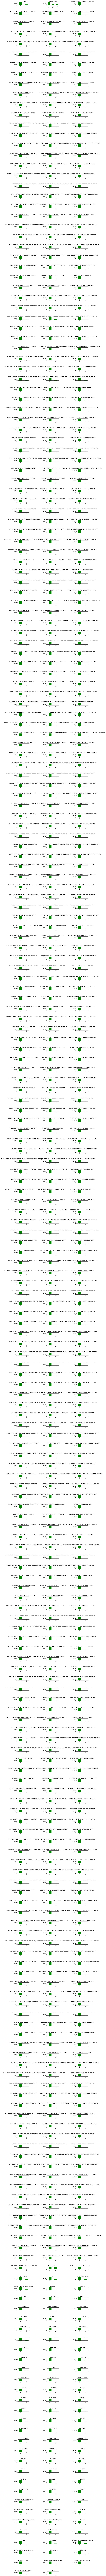

In [42]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,400)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat2 :   
    plt.subplot(254,3,j) 
    df3[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

We see that most of our classes are imbalanced with 0 being the most common variable.

Plot a histogram for each of our numerical attributes.

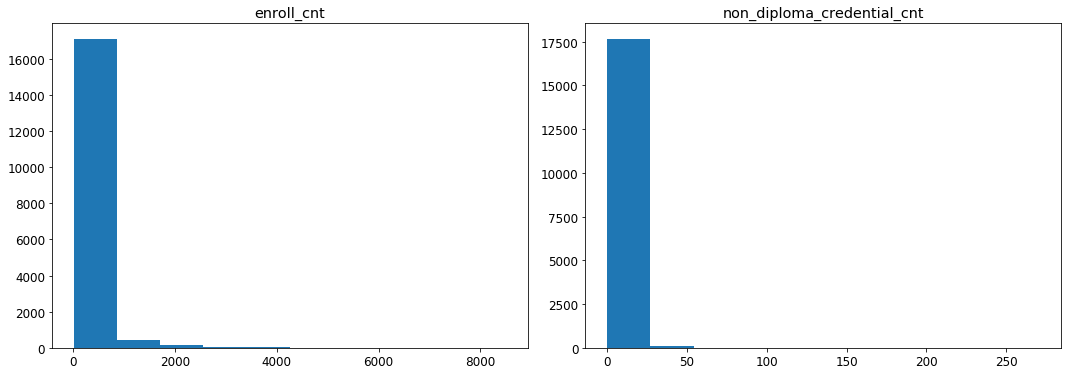

In [43]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num2 :   
    plt.subplot(4,2,j) 
    plt.hist(df3[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) enroll_cnt is right-skewed. It has 1,365 unique values with a mode of 5, a median of 60, and a mean of 180.<br>
4) non_diploma_credential_cnt is right-skewed. It has 72 unique values with a mode of 0, a median of 0, and a mean of 2.<br>

We will now check the boxplots for outliers.

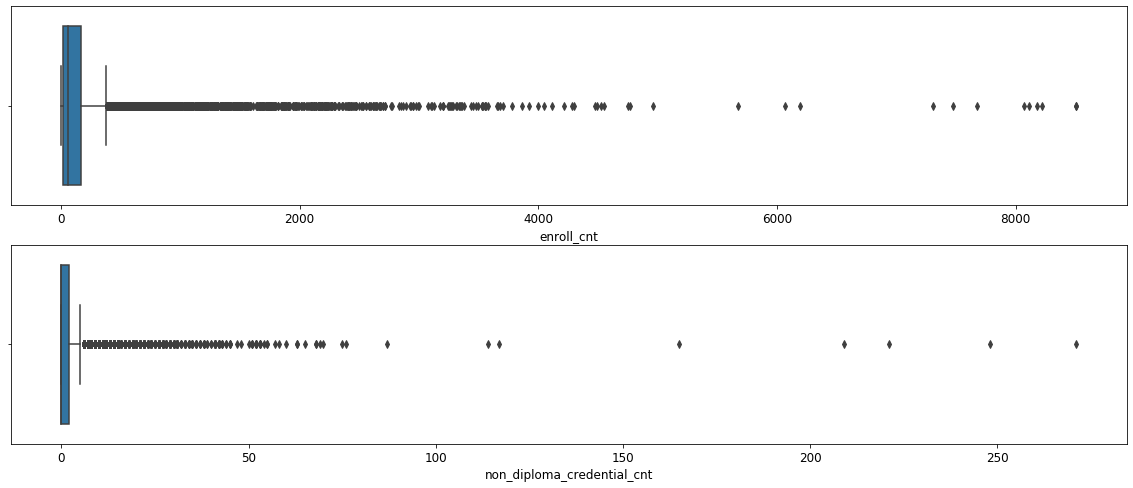

In [44]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,30))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num2 :    
    plt.subplot(7,1,j) 
    sns.boxplot(x=k, data=df3);
    j=j+1

#Show results    
plt.show()

We still have a lot of outliers in our data.

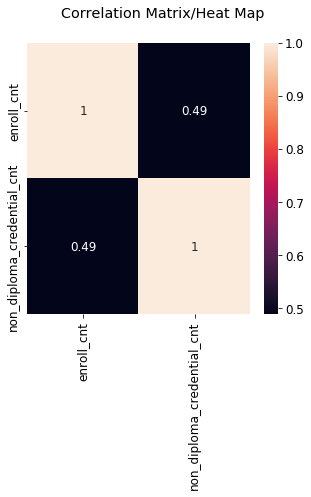

In [45]:
#Graph heat map for correlation
corr_num=df3[col_num2].corr()
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

There are no highly correlated variables in our numeric attributes.

Plot the numerical values again the response variable to see the more predictive variables.

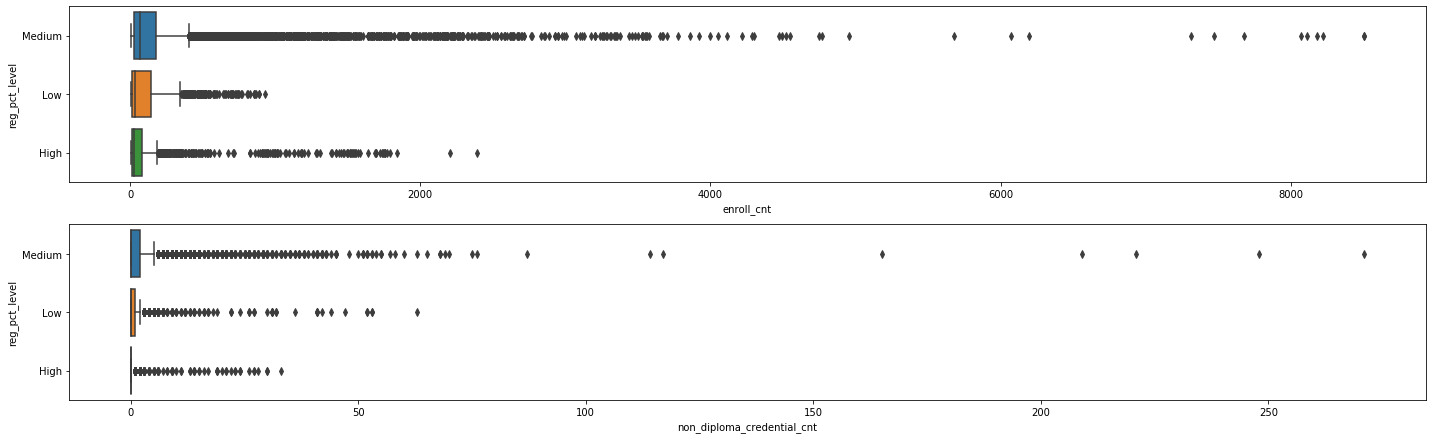

In [46]:
#Set plot parameters
plt.rcParams.update({'font.size': 10,'figure.figsize':(20,30)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical attribute
for k in df3[col_num2].columns.to_list():    
    plt.subplot(10,1,j) 
    sns.boxplot(data=df3, x=k, y=df3['reg_pct_level'])
    j=j+1

plt.tight_layout()

#Show results    
plt.show()

enroll_cnt and non_diploma_crediential_cnt both look like that have predictive ability for our response variable reg_pct_level.

<h3><b>Decision Tree + Random Forest Modeling</h3></b>

Feature Importance

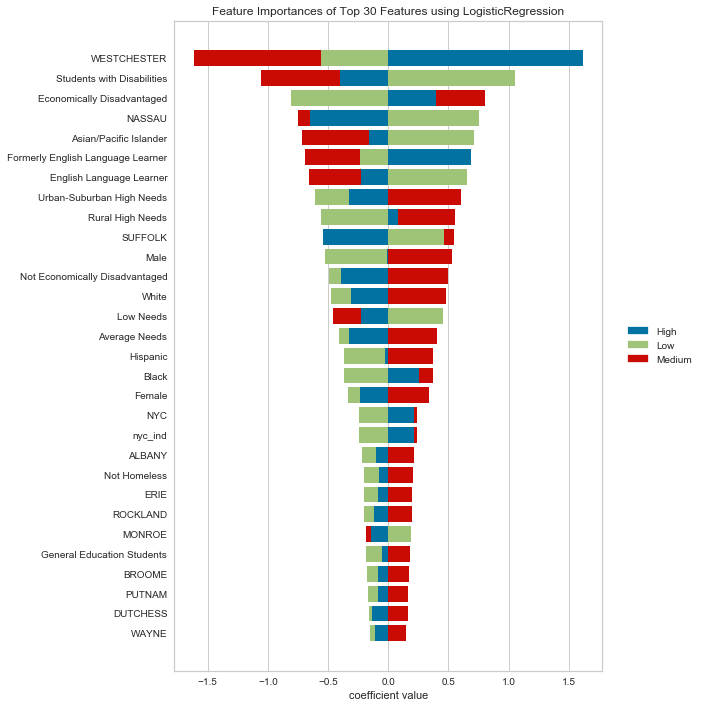

In [47]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression

X = df3.drop(['reg_pct_level'], axis=1)
y = df3.reg_pct_level

lr = LogisticRegression(random_state=42)
fig, ax = plt.subplots(figsize=(10, 10))
fi_viz = FeatureImportances(lr, stack=True, relative=False, topn=30)
fi_viz.fit(X, y)
fi_viz.poof()

According to yellowbrick feature importance, the 30 most important features in order of importance are as follows:

- WESTCHESTER
- Students with Disabilities
- Economically Disadvantaged
- NASSAU
- Asian/Pacific Islander
- Formerly English Language Learner
- English Language Learner
- Urban-Suburban High Needs
- Rural High Needs
- SUFFOLK
- Male
- Not Economically Disadvantaged
- White
- Low Needs
- Average Needs
- Hispanic
- Black
- Female
- NYC
- nyc_ind
- ALBANY
- Not Homeless
- ERIE
- ROCKLAND
- MONROE
- General Education Students
- BROOME
- PUTNAM
- DUTCHESS
- WAYNE


Generating lists of our top predictors to use in our models

In [48]:
top30predictors = ['WESTCHESTER','Students with Disabilities','Economically Disadvantaged',
'NASSAU','Asian/Pacific Islander','Formerly English Language Learner','English Language Learner','Urban-Suburban High Needs',
'Rural High Needs','SUFFOLK','Male','Not Economically Disadvantaged','White','Low Needs','Average Needs','Hispanic','Black','Female','NYC',
'nyc_ind','ALBANY','Not Homeless','ERIE','ROCKLAND','MONROE','General Education Students','BROOME','PUTNAM','DUTCHESS','WAYNE']

top15predictors = ['WESTCHESTER','Students with Disabilities','Economically Disadvantaged',
'NASSAU','Asian/Pacific Islander','Formerly English Language Learner','English Language Learner','Urban-Suburban High Needs',
'Rural High Needs','SUFFOLK','Male','Not Economically Disadvantaged','White','Low Needs','Average Needs']

Split the data into training and testing subsets.

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score

#Prepare data for classification process
#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

Find the optimal parameters for our decision trees.<br>
Source: https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [115]:
pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]

check_params = {"decsT__criterion":['gini', 'entropy'],
               "decsT__max_depth": np.arange (3, 17)}
               
pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decsT', DecisionTreeClassifier())])


In [116]:
#from tqdm import tqdm_notebook as tqdm

#print("start fitting the data")
#import warnings
#warnings.filterwarnings("ignore")

#for cv in tqdm(range(3,6)):
    #create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    #create_grid.fit(X_train, y_train)
    #print("score for %d fold CV : = %3.2f" %(cv, create_grid.score(X_test, y_test)))
    #print("best fit parameters from GridSearch")
    #print(create_grid.best_params_)
#print("out of the loop")

start fitting the data


score for 3 fold CV : = 0.84
best fit parameters from GridSearch
{'decsT__criterion': 'gini', 'decsT__max_depth': 15}
score for 4 fold CV : = 0.85
best fit parameters from GridSearch
{'decsT__criterion': 'gini', 'decsT__max_depth': 16}
score for 5 fold CV : = 0.85
best fit parameters from GridSearch
{'decsT__criterion': 'gini', 'decsT__max_depth': 15}
out of the loop


This took about 5 minutes to run with the above specifications so we have commented it out.  The results were as follows:

|    # of CV Folds    |   3  | 4    | 5    |
|:-------------------:|:----:|------|------|
| Score for x fold CV | 0.84 | 0.85 | 0.85 |
|      Criterion      | gini | gini | gini |
|      Max Depth      |  15  | 16   | 15   |

The optimal settings for our decision trees are the criterion of 'gini' and a max_depth of 15.

Since reg_pct_level is imbalanced, we will apply SMOTE to our training data set.

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 420) 
Xs_train, ys_train = sm.fit_resample(X_train, y_train.ravel())

As for the predictors for our models, we will try three versions of a decision tree and a random forest. The first set of models will feature our 15 best predictors as denoted by our Yellowbrick visualization. The second set of models will feature our 30 best predictors as denoted by our Yellowbrick visualization. The third set of models will feature the entire dataset as our set of predictors.

In [58]:
#Select variables for DecisionTree/Random Forest Model 1 (best 15 predictors)
X1_train = Xs_train[top15predictors]
y1_train = ys_train

X1_test = X_test[top15predictors]
y1_test = y_test

#Select variables for DecisionTree/Random Forest Model 2 (best 30 predictors)
X2_train = Xs_train[top30predictors]
y2_train = ys_train

X2_test = X_test[top30predictors]
y2_test = y_test

#Select variables for DecisionTree/Random Forest Model 3 (entire dataset)
X3_train = Xs_train
y3_train = ys_train

X3_test = X_test
y3_test = y_test

<h4><b>Decision Trees</b></h4>

<b> Model 1<b>

In [111]:
#Create decision tree and fit it to the training data
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_dt1 = DecisionTreeClassifier(random_state=420, criterion='gini', max_depth = 15)
clf_dt1 = clf_dt1.fit(X1_train, y1_train)

In [112]:
#Predict
pred1 = clf_dt1.predict(X1_train)

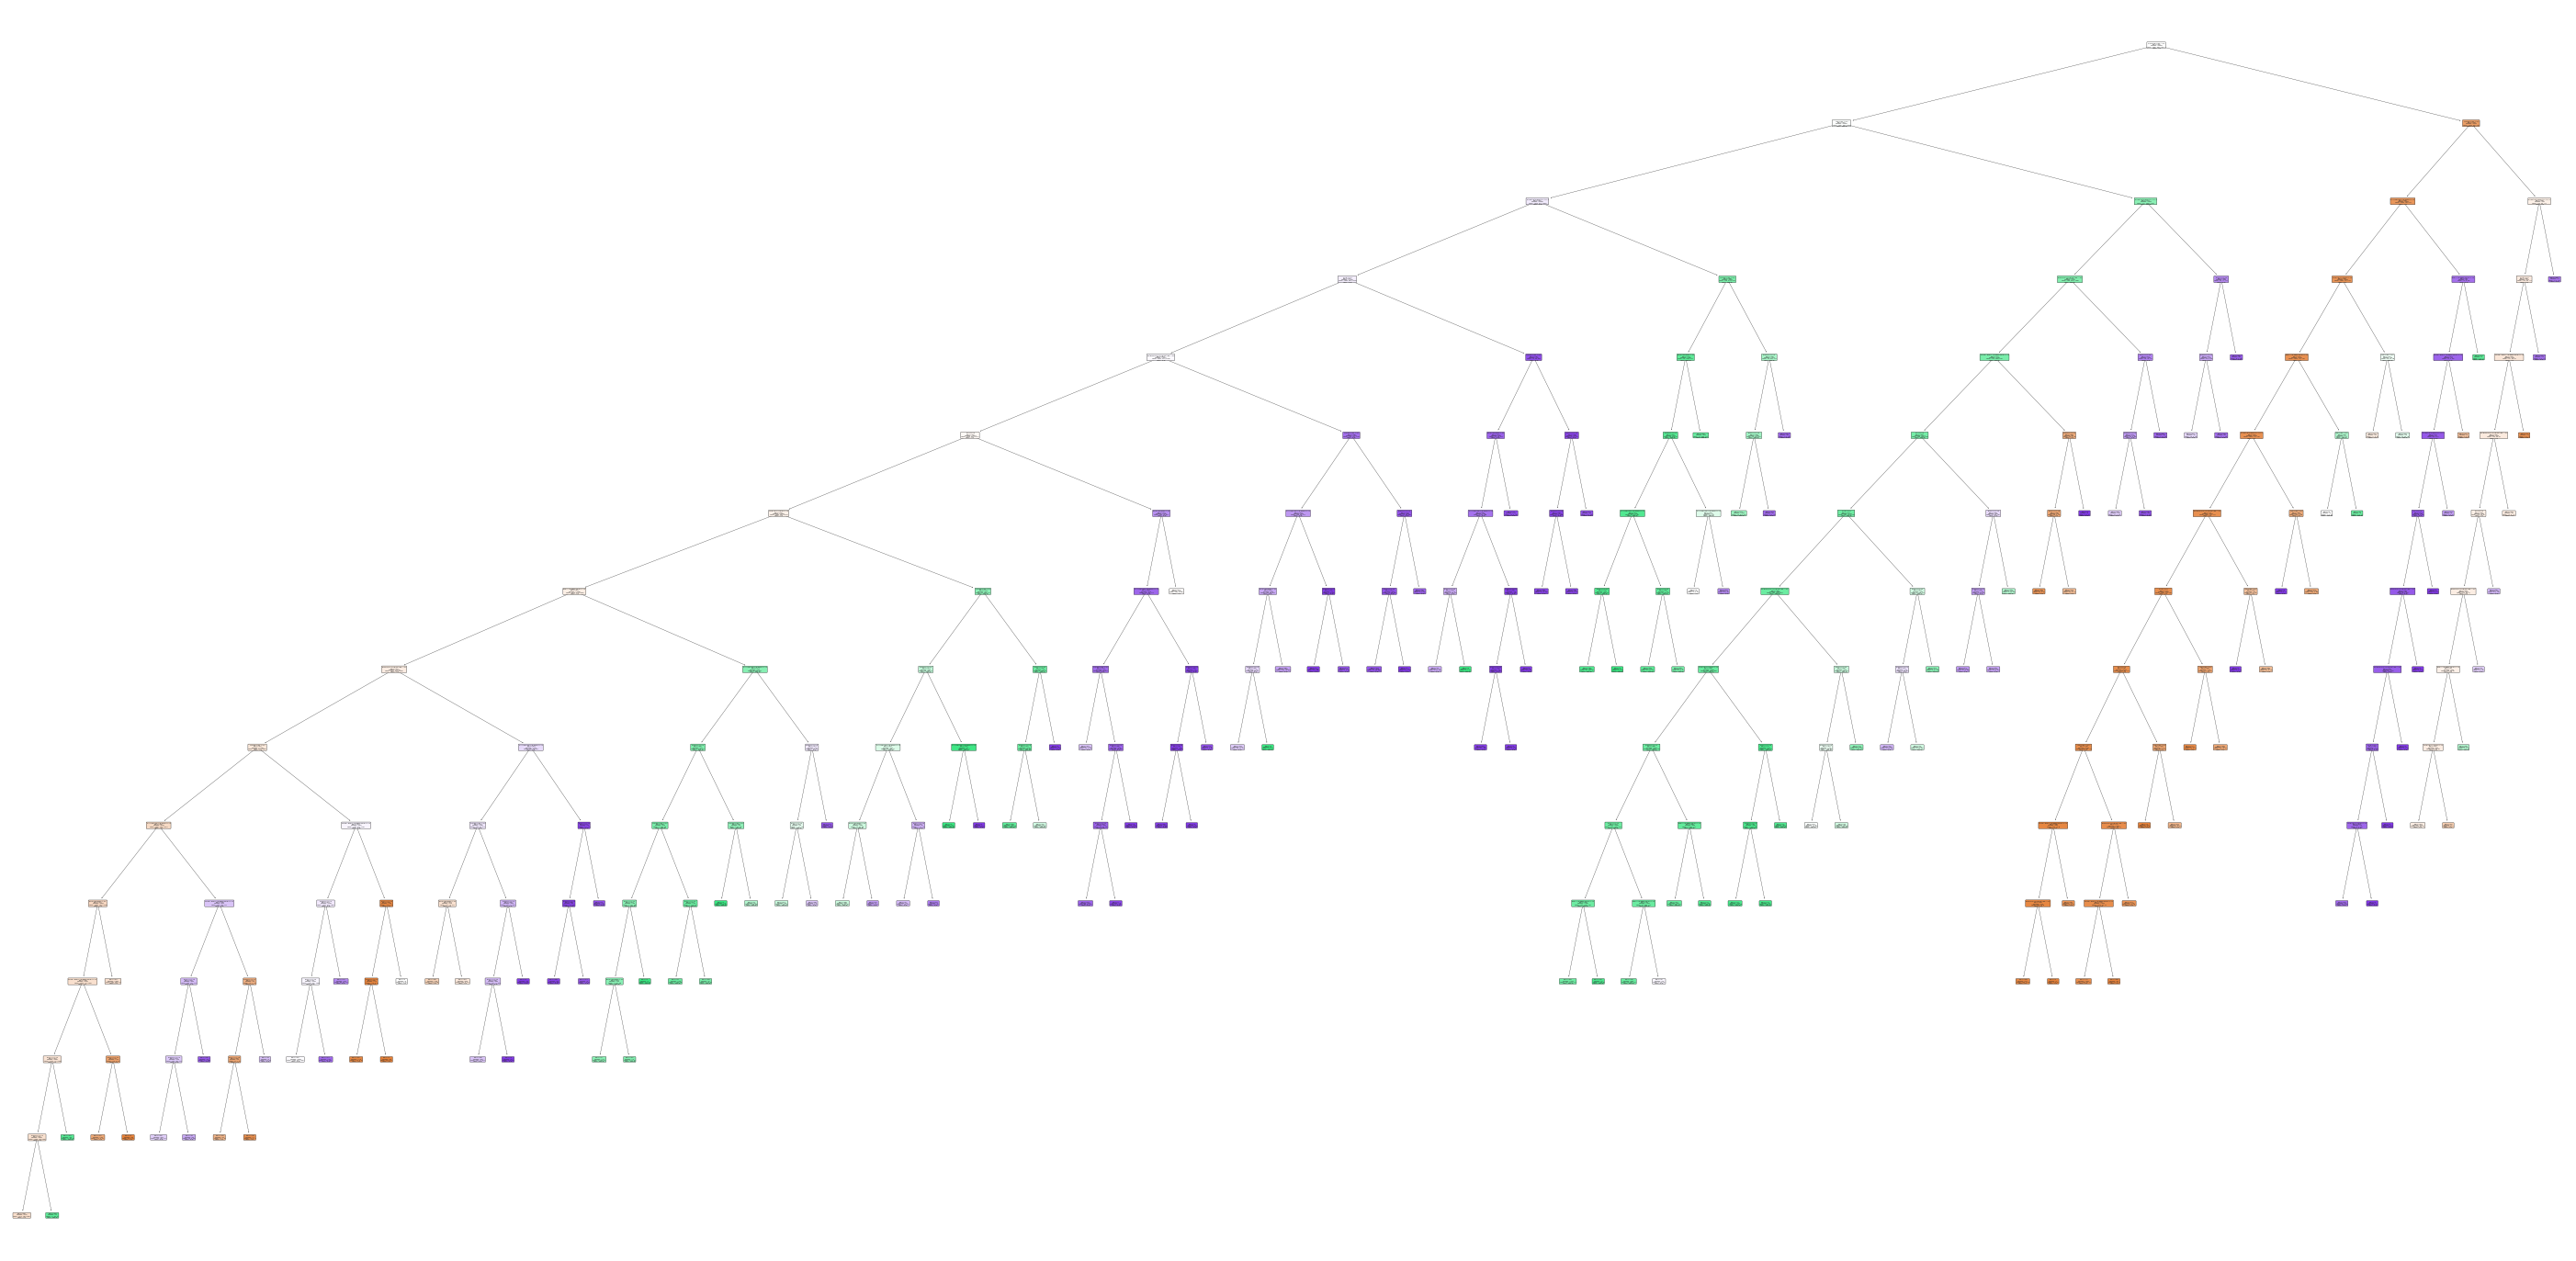

In [113]:
#Plot the tree
plt.figure(figsize = (50, 25))
tree.plot_tree(clf_dt1,
         filled=True,
         rounded=True,
         class_names=['Low', 'Medium', 'High'],
         feature_names=X1_train.columns);

In [109]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf_dt1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores1)
print(scores1.mean())

[0.60755109 0.64530655 0.65535158 0.65107415 0.65107415 0.66805267
 0.65488565 0.64622315 0.66077616 0.64968815]
0.6489983295490742


Build a multiclass confusion matrix and other classification metrics.<br>
Source: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [110]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, pred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, pred1, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[6536  457 2628]
 [1775 6347 1499]
 [2096 1498 6027]]

Classification Report

              precision    recall  f1-score   support

         Low       0.63      0.68      0.65      9621
      Medium       0.76      0.66      0.71      9621
        High       0.59      0.63      0.61      9621

    accuracy                           0.66     28863
   macro avg       0.66      0.66      0.66     28863
weighted avg       0.66      0.66      0.66     28863



Decision Tree Model 1 has:

- an accuracy score of 66%
- a weighted average precision score of 66%
- a weighted average recall score of 66%
- a weighted average F1 score of 66%

Not amazing scores. Let's see if using the top 30 predictors will give us a better model.

<b> Model 2<b>

In [64]:
#Create second decision tree and fit it to the training data

clf_dt2 = DecisionTreeClassifier(random_state=420, criterion='gini', max_depth = 15)
clf_dt2 = clf_dt2.fit(X2_train, y2_train)

In [65]:
#Predict
pred2 = clf_dt2.predict(X2_train)

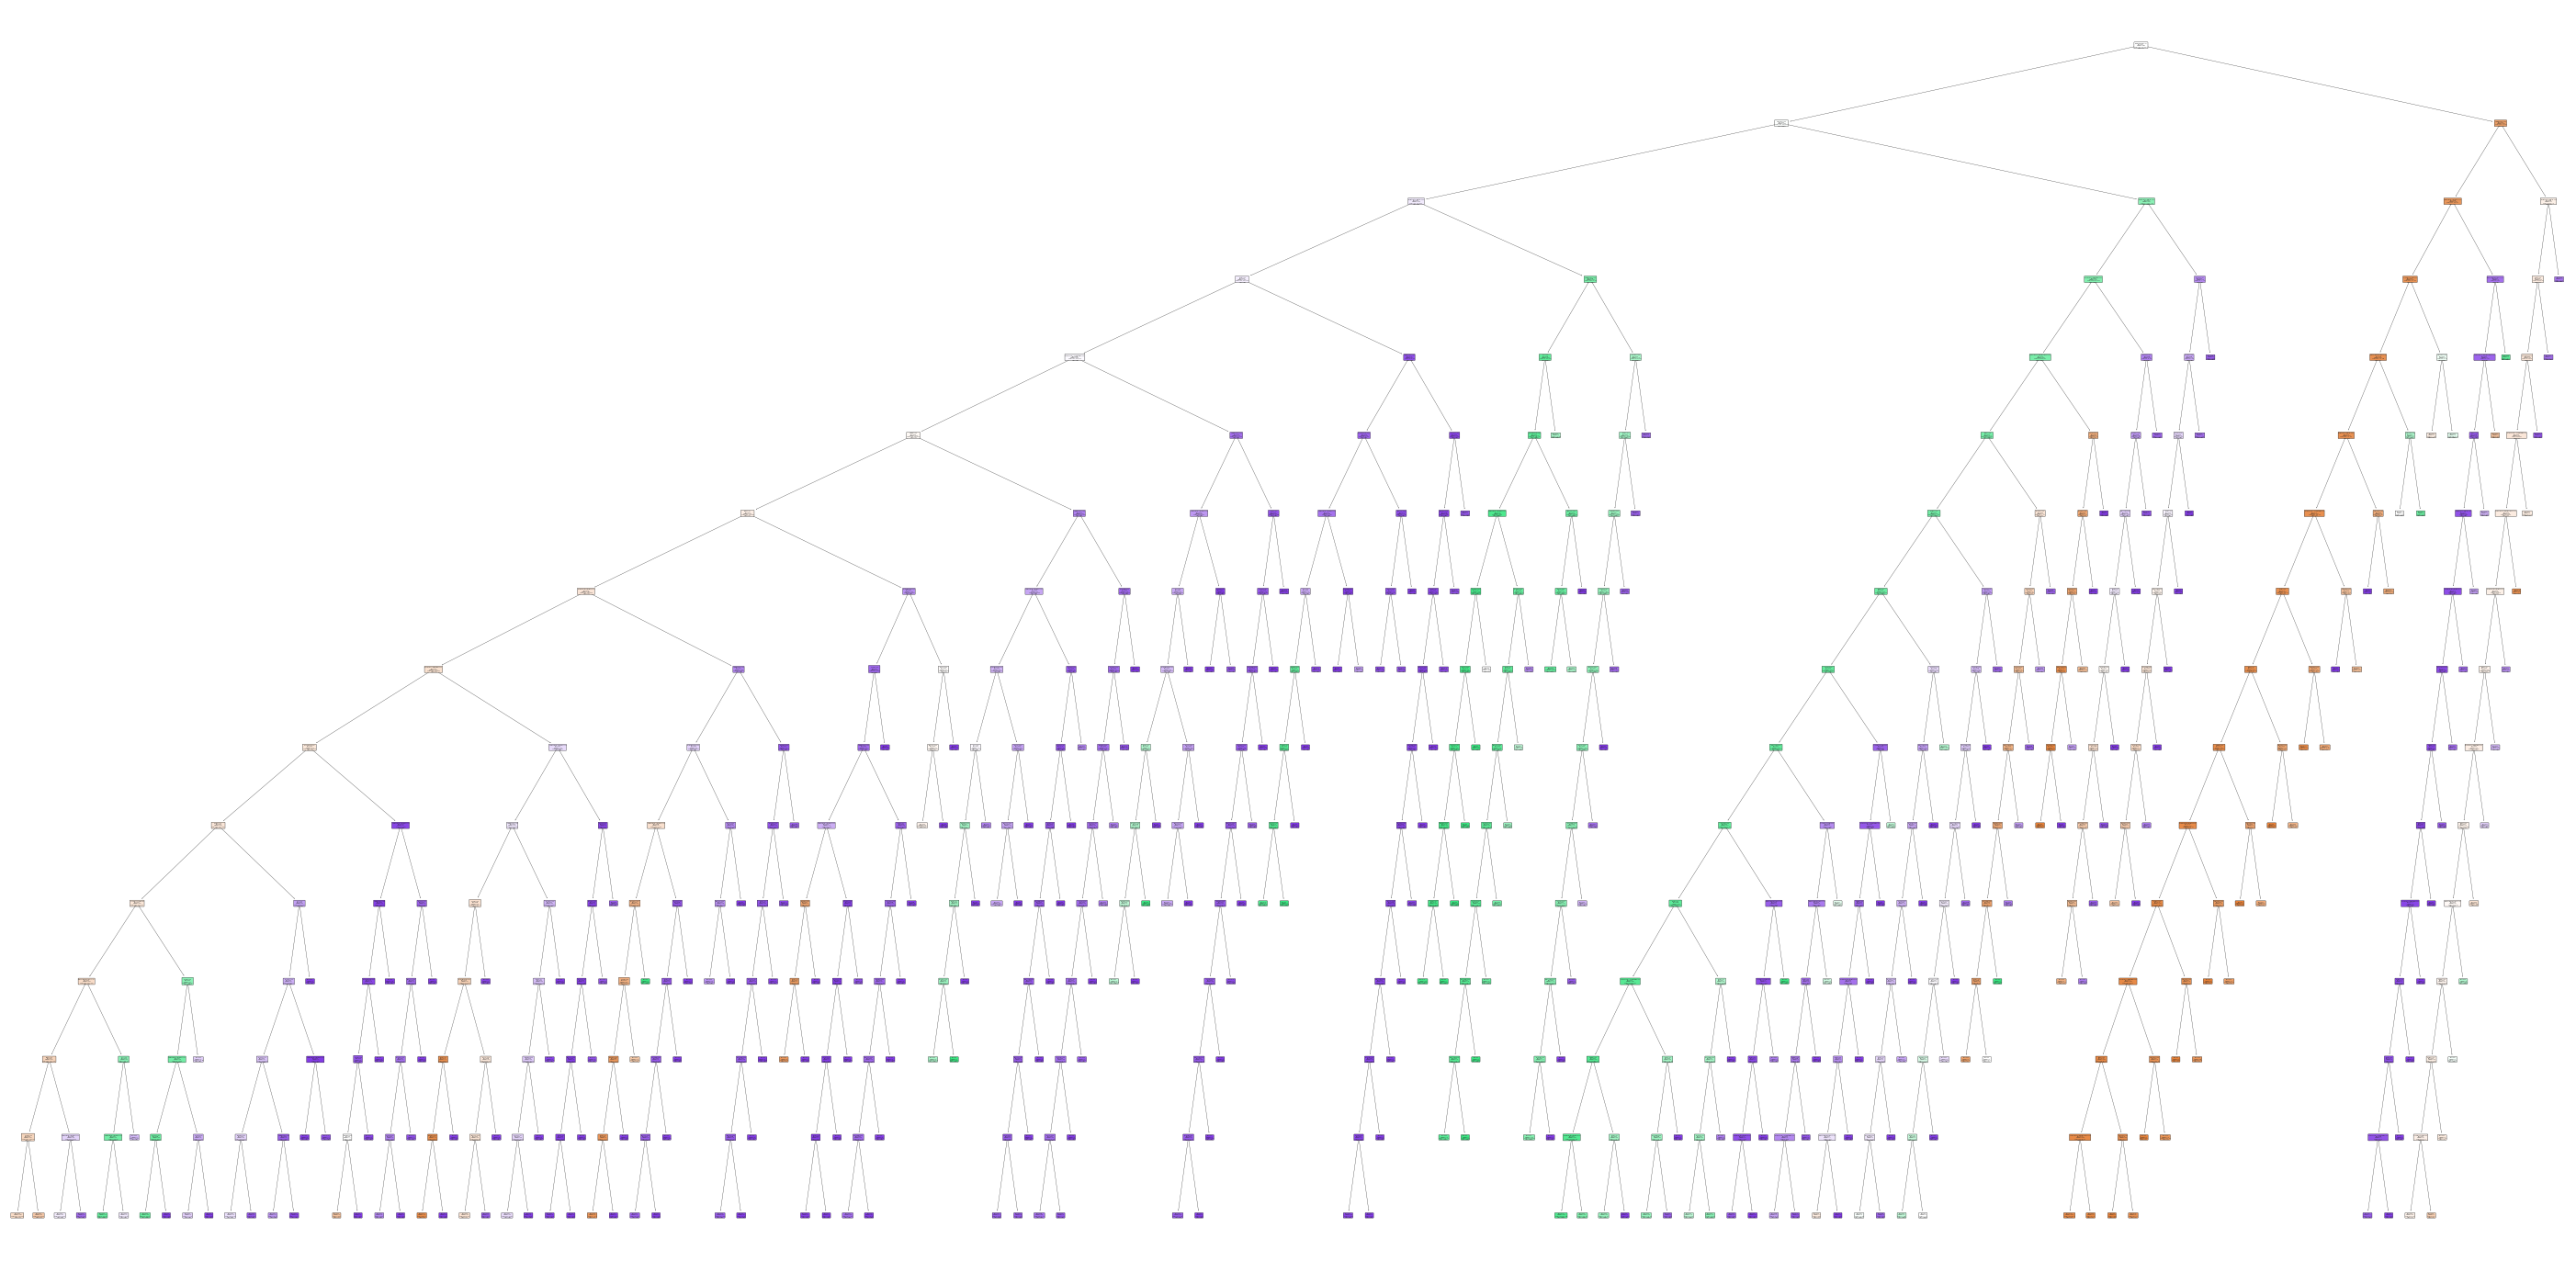

In [66]:
#Plot the tree
plt.figure(figsize = (50, 25))
tree.plot_tree(clf_dt2,
         filled=True,
         rounded=True,
         class_names=['Low', 'Medium', 'High'],
         feature_names=X2_train.columns);

In [67]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf_dt2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores2)
print(scores2.mean())

[0.62036716 0.72878421 0.73779009 0.73665974 0.72141372 0.74255024
 0.74636175 0.73284823 0.73111573 0.73250173]
0.7230392605176117


In [68]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_train, pred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_train, pred2, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7749  408 1464]
 [2717 6286  618]
 [1553 1095 6973]]

Classification Report

              precision    recall  f1-score   support

         Low       0.64      0.81      0.72      9621
      Medium       0.81      0.65      0.72      9621
        High       0.77      0.72      0.75      9621

    accuracy                           0.73     28863
   macro avg       0.74      0.73      0.73     28863
weighted avg       0.74      0.73      0.73     28863



Decision Tree Model 2 has:

- an accuracy score of 73%
- a weighted average precision score of 74%
- a weighted average recall score of 73%
- a weighted average F1 score of 73%

There was some improvement after using double the number of predictors. Now let's see what using the entire dataset will do to our final version of our decision tree.

<b> Model 3<b>

In [90]:
#Create third decision tree and fit it to the training data

clf_dt3 = DecisionTreeClassifier(random_state=420, criterion='gini', max_depth = 15)
clf_dt3 = clf_dt3.fit(X3_train, y3_train)

In [91]:
#Predict
pred3 = clf_dt3.predict(X3_train)

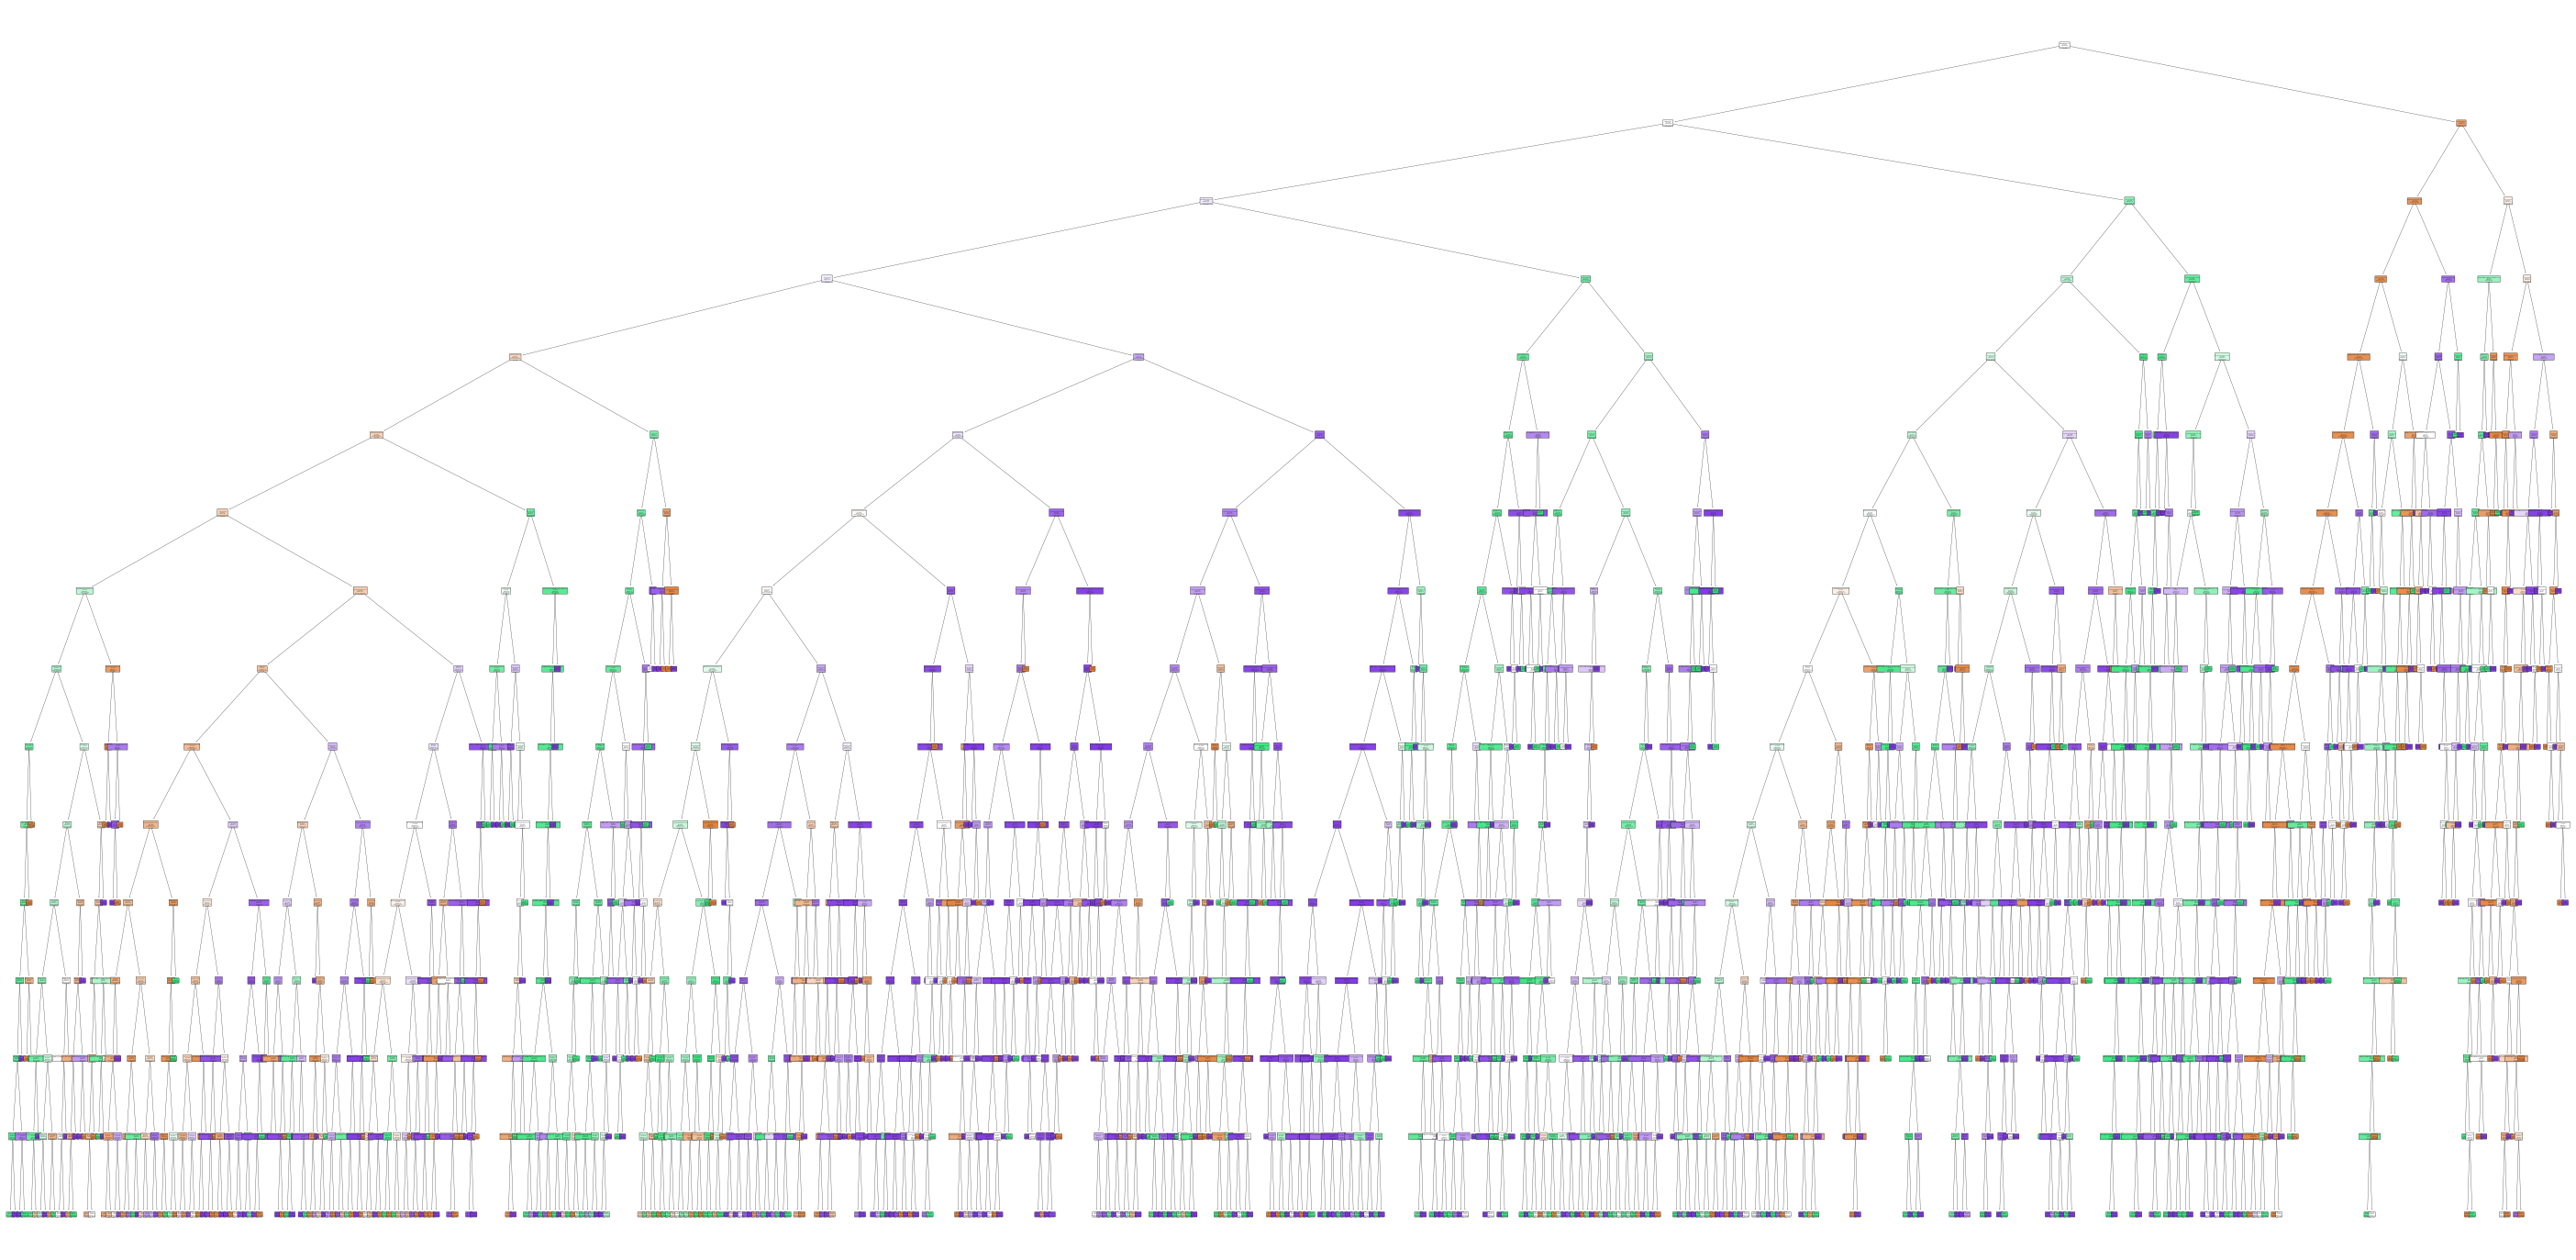

In [92]:
#Plot the tree
plt.figure(figsize = (50, 25))
tree.plot_tree(clf_dt3,
         filled=True,
         rounded=True,
         class_names=['Low', 'Medium', 'High'],
         feature_names=X3_train.columns);

In [93]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(clf_dt3, X3_train, y3_train, cv=10, scoring='accuracy')
print(scores3)
print(scores3.mean())

[0.67855906 0.80914444 0.81884309 0.81566182 0.81739432 0.83575884
 0.81912682 0.82328482 0.81288981 0.83298683]
0.806364984525705


In [94]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y3_train, pred3)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y3_train, pred3, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[8540  620  461]
 [1238 8129  254]
 [1062  602 7957]]

Classification Report

              precision    recall  f1-score   support

         Low       0.79      0.89      0.83      9621
      Medium       0.87      0.84      0.86      9621
        High       0.92      0.83      0.87      9621

    accuracy                           0.85     28863
   macro avg       0.86      0.85      0.85     28863
weighted avg       0.86      0.85      0.85     28863



Decision Tree Model 3 has:

- an accuracy score of 85%
- a weighted average precision score of 86%
- a weighted average recall score of 85%
- a weighted average F1 score of 85%

Overall, our final decision tree provided great results without being overfit. 

<h4><b>Random Forests</b></h4>

<b> Model 1 <b>

In [74]:
#Create first random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier
rnd_clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, random_state=420)
rnd_clf1.fit(X1_train, y1_train)

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, random_state=420)

In [75]:
#Predict
RFpred1 = rnd_clf1.predict(X1_train)

In [76]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(rnd_clf1, X1_train, y1_train, cv=10, scoring='accuracy')
print(scores4)
print(scores4.mean())

[0.63249047 0.63837894 0.63803256 0.63374913 0.63756064 0.64691615
 0.63756064 0.63305613 0.64137214 0.63097713]
0.6370093935559817


In [77]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_train, RFpred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_train, RFpred1, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[6239  572 2810]
 [1813 6443 1365]
 [1910 1974 5737]]

Classification Report

              precision    recall  f1-score   support

         Low       0.63      0.65      0.64      9621
      Medium       0.72      0.67      0.69      9621
        High       0.58      0.60      0.59      9621

    accuracy                           0.64     28863
   macro avg       0.64      0.64      0.64     28863
weighted avg       0.64      0.64      0.64     28863



Random Forest Model 1 has:

- an accuracy score of 64%
- a weighted average precision score of 64%
- a weighted average recall score of 64%
- a weighted average F1 score of 64%

This model's performance is similar to our first decision tree featuring the same top 15 predictors.

<b> Model 2 <b>

In [78]:
#Create second random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier
rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, random_state=420)
rnd_clf2.fit(X2_train, y2_train)

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, random_state=420)

In [79]:
#Predict
RFpred2 = rnd_clf2.predict(X2_train)

In [80]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores5 = cross_val_score(rnd_clf2, X2_train, y2_train, cv=10, scoring='accuracy')
print(scores5)
print(scores5.mean())

[0.63664704 0.64773121 0.64946311 0.65176715 0.65731116 0.66042966
 0.66493416 0.65523216 0.65107415 0.64379764]
0.6518387442356961


In [81]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y2_train, RFpred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y2_train, RFpred2, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[5633  546 3442]
 [1844 6378 1399]
 [ 914 1876 6831]]

Classification Report

              precision    recall  f1-score   support

         Low       0.67      0.59      0.63      9621
      Medium       0.72      0.66      0.69      9621
        High       0.59      0.71      0.64      9621

    accuracy                           0.65     28863
   macro avg       0.66      0.65      0.65     28863
weighted avg       0.66      0.65      0.65     28863



Random Forest Model 2 has:

- an accuracy score of 65%
- a weighted average precision score of 66%
- a weighted average recall score of 65%
- a weighted average F1 score of 65%

This model only performs slightly better than our first random forest model.

<b> Model 3 <b>

In [82]:
#Create third random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier
rnd_clf3 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, random_state=420)
rnd_clf3.fit(X3_train, y3_train)

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, random_state=420)

In [83]:
#Predict
RFpred3 = rnd_clf3.predict(X3_train)

In [98]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores6 = cross_val_score(rnd_clf3, X3_train, y3_train, cv=10, scoring='accuracy')
print(scores6)
print(scores6.mean())

[0.64877035 0.72913059 0.73848285 0.73665974 0.72522523 0.74566875
 0.74012474 0.73492723 0.74255024 0.73873874]
0.7280278453295426


In [85]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y3_train, RFpred3)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y3_train, RFpred3, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[7299  798 1524]
 [1901 6841  879]
 [1069 1425 7127]]

Classification Report

              precision    recall  f1-score   support

         Low       0.71      0.76      0.73      9621
      Medium       0.75      0.71      0.73      9621
        High       0.75      0.74      0.74      9621

    accuracy                           0.74     28863
   macro avg       0.74      0.74      0.74     28863
weighted avg       0.74      0.74      0.74     28863



Random Forest Model 3 has:

- an accuracy score of 74%
- a weighted average precision score of 74%
- a weighted average recall score of 74%
- a weighted average F1 score of 74%

This model's performance did not match the performance of our first decision tree with both models using the whole dataset.

A summary of all the models' performance can be seen below.

| Metrics                    | DT 1 | DT 2 | DT 3 | RF 1 | RF 2 | RF 3 |
|----------------------------|------|------|------|------|------|------|
| Max Depth                  | 15   | 15   | 15   | 15   | 15   | 15   |
| Avg Cross Validation Score | 0.65 | 0.72 | 0.81 | 0.64 | 0.65 | 0.73 |
| Weighted Accuracy          | 0.66 | 0.73 | 0.85 | 0.64 | 0.65 | 0.74 |
| Weighted Precision         | 0.66 | 0.74 | 0.86 | 0.64 | 0.66 | 0.74 |
| Weighted Recall            | 0.66 | 0.73 | 0.85 | 0.64 | 0.65 | 0.74 |
| Weighted F1 Score          | 0.66 | 0.73 | 0.85 | 0.64 | 0.65 | 0.74 |

<b><h2>Select Models</h2></b>

We will apply the testing data to Decision Tree Model 3 since it has the highest cross validation score, accuracy, precision, recall, and F1 score across all models.

In [95]:
#Predict values using test data and third decision tree model.
pred7 = clf_dt3.predict(X3_test)

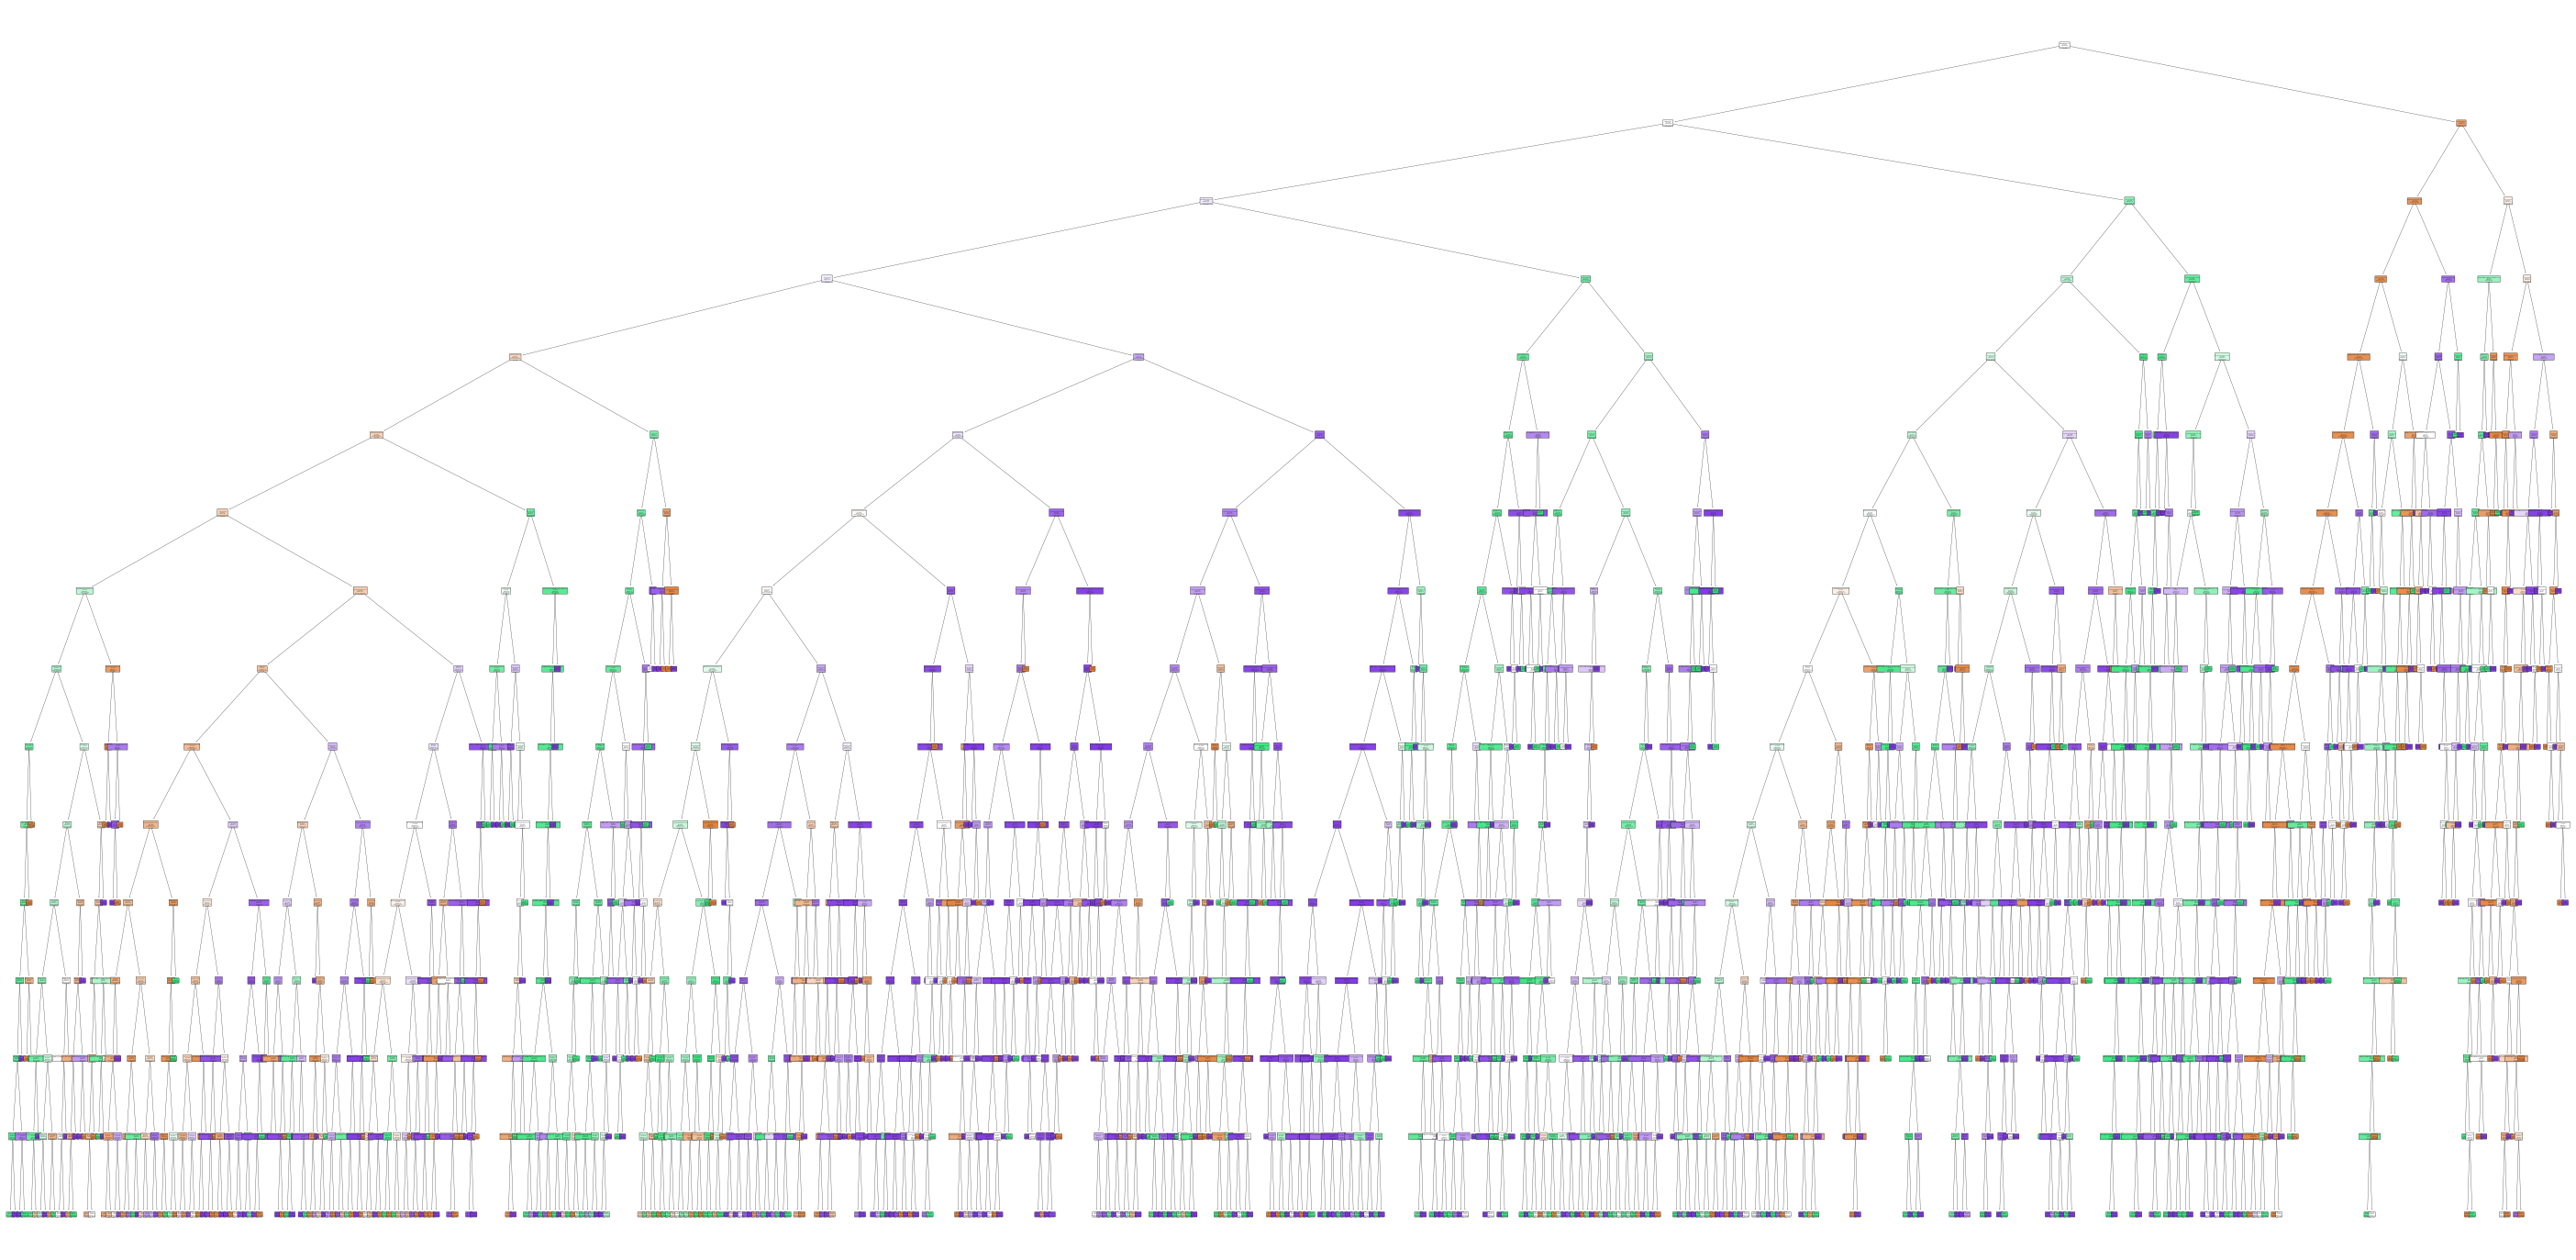

In [96]:
#Plot the tree
plt.figure(figsize = (50, 25))
tree.plot_tree(clf_dt3,
         filled=True,
         rounded=True,
         class_names=['Low', 'Medium', 'High'],
         feature_names=X3_test.columns);

In [97]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y3_test, pred7)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y3_test, pred7, target_names=['Low', 'Medium', 'High']))

Confusion Matrix

[[ 355   27  173]
 [  54  381  163]
 [ 649  420 3657]]

Classification Report

              precision    recall  f1-score   support

         Low       0.34      0.64      0.44       555
      Medium       0.46      0.64      0.53       598
        High       0.92      0.77      0.84      4726

    accuracy                           0.75      5879
   macro avg       0.57      0.68      0.60      5879
weighted avg       0.81      0.75      0.77      5879



Our final decision tree model has:

- an accuracy score of 75%
- a weighted average precision score of 81%
- a weighted average recall score of 75%
- a weighted average F1 score of 77%

This model did fairly well on our testing data.  We would expect the testing data metric's to be less than the training data metrics for this model.

| Metrics            | DT 3 - Train | DT 3 - Test |
|--------------------|--------------|-------------|
| Max Depth          | 15           | 15          |
| Weighted Accuracy  | 0.85         | 0.75        |
| Weighted Precision | 0.86         | 0.81        |
| Weighted Recall    | 0.85         | 0.75        |
| Weighted F1 Score  | 0.85         | 0.77        |

<h2><b>Conclusion</h2></b>

After preparing our data, we found the best results came from decision tree model 3 which utilized the entire data set pruned to an optimized 15 nodes.  The training data produced an accuracy, precision, recall, and F1 score of 85%. Decision tree model 3 did well at predicting which categorical values (low, medium, high) is most likely to apply to a given observation. When it was applied to the previously unseen testing data, it had an accuracy of 75%, precision of 81%, recall of 75%, and an F1 score of 77%.